# E-Commerce Data Analysis for TheLook

**TeamB06**: Eric Bai, Yahui Wen, Mengxin Zhao, Fahad Alsubaie, Shailoz Kumar Singh, Jessica Tong

# 1- Introduction

## 1.1- Report Summary

The e-commerce business sees an exponential trend, and 2023 sees the highest revenue for the business so far - at almost 12 million dollars. Within Product analysis, an extensive dataset showcases **26 distinct categories** and **2755 unique brands**, encapsulating a diverse array of 27,230 individual products. Notably, sales dominance is found in categories such as Intimates, Jeans, and Tops & Tees. Remarkably, *Jeans* emerged as the revenue champion, bring in 17,679 units' transaction, which makes up for $1.7 million in revenue and 0.8 million dollars in profit. The Marketing department unveiled crucial demographic insights, such as high-value customer segments in China, the United States, and Brazil, primarily aged between 35 and 64. Traffic analytics showcased **Email and Adwords** as top traffic generators, while **YouTube and Organic** traffic channels exhibited superior conversion rates. Noteworthy was the customer journey, typically concluding in around **14 clicks** or an average of **7.4 hours** before clicking into the purchase page. Operations showcased improved shipping efficiency since 2019, although with outlier shipping speeds for countries such as Columbia. Additionally, a satisfying level of inventory levels and profitability across most categories is observed, emphasizing the operational success that the company should continue. 

## 1.2- Project Proposal

### Introduction & Problem Definition

Growing an international E-commerce business is challenging as the industry is highly competitive. In the age of data-driven decision-making, leveraging business insights is not just advantageous but essential for maximizing profits and expanding market reach. This is why we wanted to use data to capitalize on revenue for an E-commerce business that, over the past four years, has experienced substantial growth in both revenue and order volume. This growth trajectory presents both opportunities and challenges in an increasingly competitive marketplace.

### Objective

The primary objective of this project is to conduct a comprehensive analysis of the business’s extensive data, particularly focusing on three key areas: marketing, product development, and operations. By delving into these segments, our aim is to uncover actionable insights that can drive strategic decision-making. Specifically, we intend to:

1. Analyze customer behavior and market trends to refine marketing strategies, enhancing customer acquisition and retention.

2. Evaluate product performance data to identify successful products and potential areas for new product development.

3. Optimize operational efficiency by analyzing order processing, delivery timelines, and supply chain management.

### Motivation

Our motivation stems from the belief that a thorough analysis of existing data can unlock a wealth of opportunities for the business. In the dynamic field of e-commerce, staying ahead requires not just adapting to change but anticipating it. Through this project, we aim to provide the business with a roadmap for sustained growth, equipping it with the insights needed to navigate the complexities of the e-commerce sector. By leveraging data analytics, we can help the business not only continue its growth trajectory but also establish a strong competitive edge.

# 2- Dataset Introduction

## 2.1- Data Source

TheLook is an e-commerce clothing store developed by the Google Looker team. All business data is accessible on Google BigQuery. The raw data includes seven tables covering information on customers, products, orders, operations and network incidents in key regions such as Europe, the United States and China. It can be accessed from [this link](https://console.cloud.google.com/bigquery?project=ba775-project-b06&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sthelook_ecommerce!3sevents). The sales transaction data involved were recorded from August 2019 to November 2023.



Upon further investigations, we divided the tables into three departments: **marketing, product** and **operation**.

## 2.2- Entity Relational Diagram

The overall ERD showcases seven distinct tables, organized into three key departments for analysis: Marketing, Product, and Operations. Below, we'll highlight the tables relevant to each department within the ERD.

The Marketing department considers `users`, `events`, `orders`, and `order_items`, aiming to explore the relationship between marketing channels and orders alongside customer demographics. A key metric of interest is the *conversion rate*.

The Product department, however, combines `users`, `orders`, `order_items`, and `products`. Their focus lies in investigating the correlation between orders, products, and users. They establish additional connections between users and orders. Key metrics include *revenue, profits*, and *order counts*.

Lastly, Operations centers around `users`, `order_items`, `products`, `distribution_centers`, and `inventory_items`. Their analysis delves into warehouse management, stock levels, and user engagement. Key metrics encompass *shipping duration*, order *processing time*, and *stock/profit comparison*, etc.

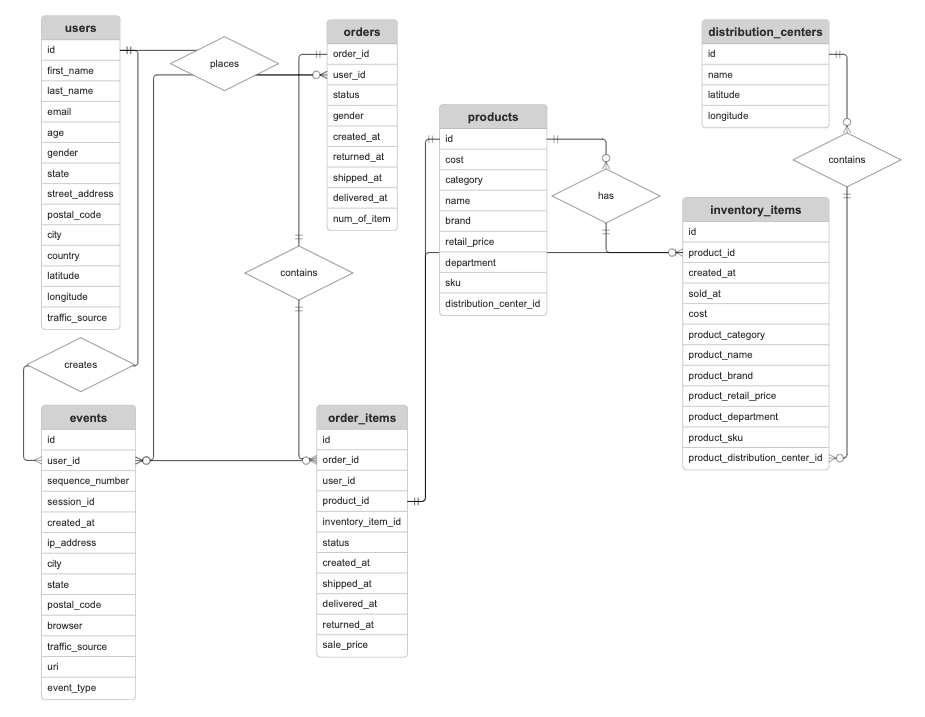

In [1]:
from IPython.display import Image
Image(filename ='image/BA775_ERD (1).png')

### Marketing Department

For the Marketing department, we believe it's crucial to aggregate marketing related data such as users, marketing events, and the order data. Hence, the four tables that we decided to join are: **users, events, orders** and **order_items**.

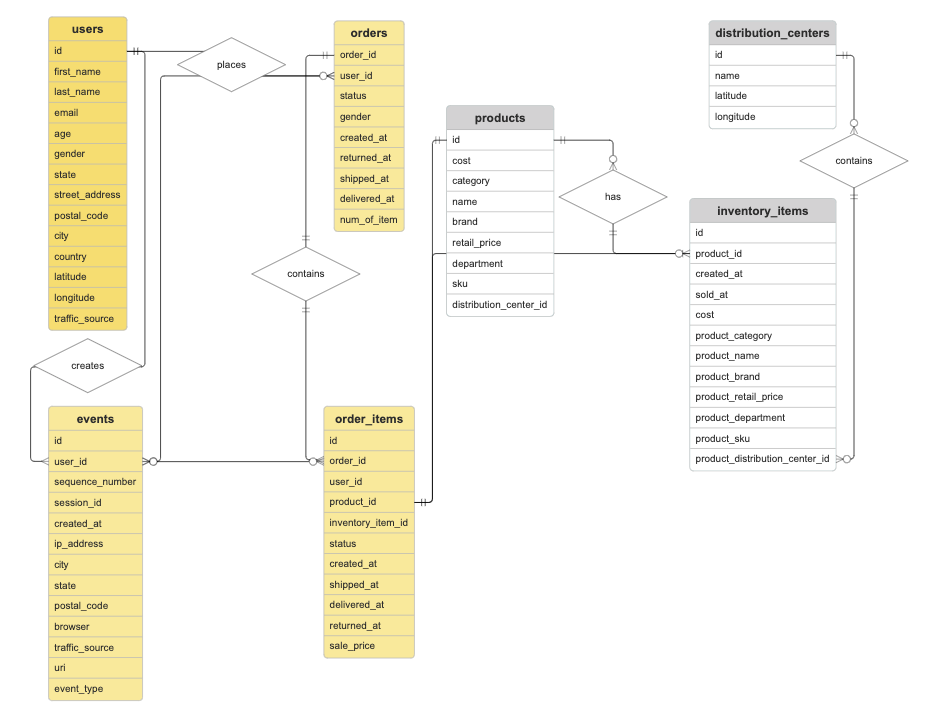

In [8]:
Image(filename ='image/marketing/BA775_ERD_marketing.png')

In [5]:
%%bigquery
CREATE TABLE IF NOT EXISTS ba775-project-b06.ecommerce_final_tables.marketing_table AS
SELECT  e.created_at AS event_time, 
        e.traffic_source, 
        e.event_type, 
        u.id AS user_id, 
        u.state, u.country, 
        u.age, 
        u.gender,
        o.order_id, 
        o.num_of_item, 
        o.created_at AS purchase_time, 
        oi.sale_price
FROM ba775-project-b06.ecommerce.events AS e 
JOIN ba775-project-b06.ecommerce.users AS u ON e.id= u.id
JOIN ba775-project-b06.ecommerce.orders AS o ON o.user_id = u.id
JOIN ba775-project-b06.ecommerce.order_items AS oi ON oi.order_id= o.order_id
WHERE 
    o.order_id IS NOT NULL AND 
    o.num_of_item IS NOT NULL AND 
    o.created_at IS NOT NULL AND 
    oi.sale_price IS NOT NULL AND 
    e.created_at IS NOT NULL AND 
    e.traffic_source IS NOT NULL AND 
    u.state IS NOT NULL AND 
    u.country IS NOT NULL AND 
    u.age IS NOT NULL AND 
    u.gender IS NOT NULL

Query is running:   0%|          |

""


In [1]:
%%bigquery
SELECT * FROM ba775-project-b06.ecommerce_final_tables.marketing_table
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,event_time,traffic_source,event_type,user_id,state,country,age,gender,order_id,purchase_time,sale_price
0,2022-07-30 22:45:59+00:00,Email,product,50859,Mie,Japan,56,M,63484,2023-10-06 06:07:00+00:00,25.0
1,2022-07-30 22:45:59+00:00,Email,product,50859,Mie,Japan,56,M,63484,2023-10-06 06:07:00+00:00,49.5


### Product Department

For the Product department, tables we decided to join are: **users, orders, order_items** and **products**.

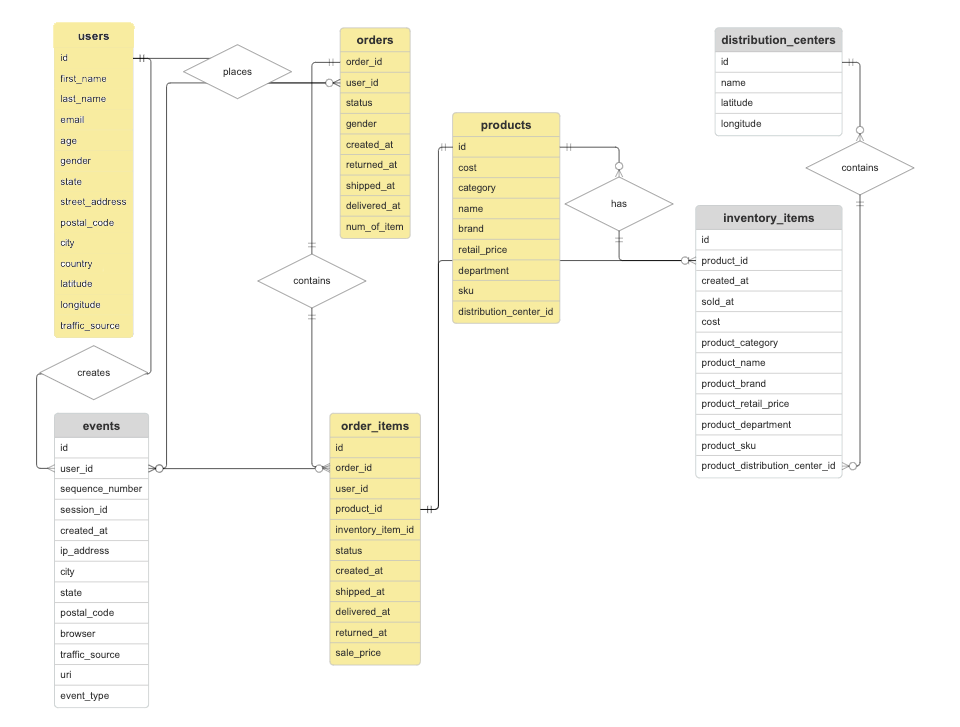

In [11]:
from IPython.display import Image
Image(filename = 'image/product/BA775_ecommerce_product (1).png')

In [12]:
%%bigquery
CREATE TABLE IF NOT EXISTS ba775-project-b06.ecommerce_final_tables.Products AS
SELECT  o.order_id,
        o.num_of_item,
        p.name,
        p.brand,
        p.category,
        p.cost AS product_cost,
        oi.sale_price,
        p.retail_price,
        o.created_at,
        oi.status,
        o.gender,
        u.age,
        p.department
FROM `bigquery-public-data.thelook_ecommerce.orders` o
JOIN `bigquery-public-data.thelook_ecommerce.order_items` oi ON o.order_id = oi.order_id
JOIN `bigquery-public-data.thelook_ecommerce.products` p ON oi.product_id = p.id
JOIN `bigquery-public-data.thelook_ecommerce.users` u ON oi.user_id = u.id
WHERE 
    o.order_id IS NOT NULL AND 
    o.num_of_item IS NOT NULL AND 
    oi.status IS NOT NULL AND 
    p.cost IS NOT NULL AND 
    p.name IS NOT NULL AND 
    p.brand IS NOT NULL AND 
    p.retail_price IS NOT NULL AND 
    p.category IS NOT NULL AND
    p.department IS NOT NULL AND
    o.gender IS NOT NULL AND
    o.created_at IS NOT NULL AND
    oi.sale_price IS NOT NULL AND
    u.age IS NOT NULL

Query is running:   0%|          |

""


In [2]:
%%bigquery
SELECT * FROM ba775-project-b06.ecommerce_final_tables.Products
LIMIT 2

Query is running:   0%|          |

Downloading:   0%|          |

,order_id,num_of_item,name,brand,category,product_cost,sale_price,retail_price,created_at,status,gender,age,department
0,290,2,Allegra K XS Grn Elastic Waist Ruffle Hem Shor...,Allegra K,Jumpsuits & Rompers,6.336,12.0,12.0,2023-08-31 01:35:00+00:00,Shipped,F,21,Women
1,23834,2,Allegra K Lady Stripes Upper Stretchy Waist Si...,Allegra K,Jumpsuits & Rompers,6.624,12.0,12.0,2020-04-15 07:33:00+00:00,Shipped,F,45,Women


### Operation Department

For the Operation department, tables we decided to join are: **users, products, order_items, distribution_centers** and **inventory_items**.

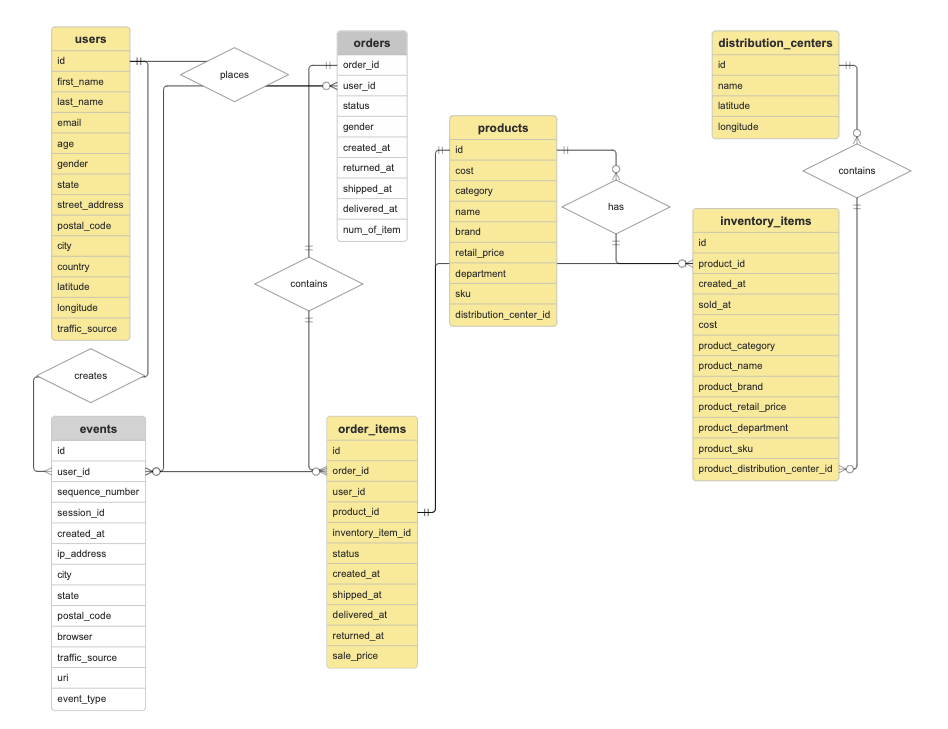

In [6]:
from IPython.display import Image
Image (filename= 'image/operation/BA775_ecommerce_operations.png')

In [10]:
%%bigquery
CREATE OR REPLACE TABLE ba775-project-b06.ecommerce_final_tables.operation_table AS
SELECT o.inventory_item_id, 
       o.order_id, 
       o.user_id,
       o.product_id,
       o.status,
       o.created_at, 
       o.shipped_at,
       o.delivered_at,
       o.returned_at,
       u.state, 
       u.country,
       i.product_distribution_center_id, 
       i.product_name,
       d.name as product_distribution_center_name,
       d.latitude,
       d.longitude
FROM `bigquery-public-data.thelook_ecommerce.users` u
right JOIN `bigquery-public-data.thelook_ecommerce.order_items` o ON o.user_id= u.id
right JOIN `bigquery-public-data.thelook_ecommerce.inventory_items` i ON o.inventory_item_id = i.id
right JOIN `bigquery-public-data.thelook_ecommerce.distribution_centers` d ON d.id = i.product_distribution_center_id
WHERE 
    o.inventory_item_id IS NOT NULL AND
    o.order_id IS NOT NULL AND
    o.user_id IS NOT NULL AND
    o.product_id IS NOT NULL AND
    o.status IS NOT NULL AND
    u.country IS NOT NULL AND
    i.product_distribution_center_id IS NOT NULL AND
    i.product_name IS NOT NULL AND
    d.name IS NOT NULL AND
    o.created_at < TIMESTAMP('2023-12-01 00:00:00')

Query is running:   0%|          |

""


In [20]:
%%bigquery
SELECT * FROM ba775-project-b06.ecommerce_final_tables.operation_table
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,inventory_item_id,order_id,user_id,product_id,status,created_at,shipped_at,delivered_at,returned_at,state,country,product_distribution_center_id,product_name,product_distribution_center_name,latitude,longitude
0,212264,54045,42949,28308,Shipped,2020-11-17 14:40:04+00:00,2020-11-20 17:06:00+00:00,NaT,NaT,Guangdong,China,4,DC Men's Chino Pant,Los Angeles CA,34.05,-118.25
1,386571,98436,78432,29013,Shipped,2021-05-06 16:12:38+00:00,2021-05-03 19:57:00+00:00,NaT,NaT,Shandong,China,4,Ducti Hybrid Bi Fold Wallet,Los Angeles CA,34.05,-118.25


Below, we'll be answering questions using the three tables: 

**ba775-project-b06.ecommerce_final_tables.Marketing**

**ba775-project-b06.ecommerce_final_tables.Operation**

**ba775-project-b06.ecommerce_final_tables.Product**

## 2.3 Data Dictionary

Column | Description | Data Type| Involved Table
-------|-------------|----------|----------
order_id | The unique identifier of one order | INTEGER | Products, Marketing,Operation
num_of_item |The amount of products in one order |INTEGER | Products
name | The name of the product| STRING | Products,Operation
brand  | The brand of the product | STRING | Products
category | The category of the product | STRING | Products
product_cost | The cost of the product | FLOAT | Products
sale_price | The price of the product when the product is sold| FLOAT | Products, Marketing
retail_price| The retial price of the product that the store set| FLOAT | Products
created_at | The time when the order is created | TIMESTAMP | Products, Operation
status | The status of the order | STRING | Products, Operation
gender| Gender of the user | STRING | Products, Marketing
age | The age of the user | INTEGER | Products, Marketing
department| Whether the product is from women or men category | STRING | Products
event_time| The time that the internet event happened | TIMESTAMP | Marketing
traffic_source | Which platform did the event happened | STRING | Marketing
event_type| The type of the internet event| STRING | Marketing
user_id| The unique identifier of the user| INTEGER | Marketing,Operation
state| The state where the user is from| STRING | Marketing,Operation
country| The country where the user is from| STRING |Marketing,Operation
purchase_time| The time that the user purchase for the store| TIMESTAMP | Marketing
inventory_item_id| The unique identifier of the inventory record| INTEGER | Operation
product_id| The unique identifier of the product| INTEGER | Operation
shipped_at| The time that the order begin to ship| TIMESTAMP| Operation
delivered_at| The time that the order been delivered| TIMESTAMP | Operation
product_distribution_center_id| The unique identifier of the distribution center| INTEGER | Operation
product_distribution_center_name	| The name of the distribution center| STRING | Operation

## 2.4 Cleaning

### Null Values

In [30]:
%%bigquery

SELECT 
    COUNTIF(event_time IS NULL) AS null_event_time,
    COUNTIF(traffic_source IS NULL) AS null_traffic_source,
    COUNTIF(event_type IS NULL) AS null_event_type,
    COUNTIF(user_id IS NULL) AS null_user_id,
    COUNTIF(state IS NULL) AS null_state,
    COUNTIF(country IS NULL) AS null_country,
    COUNTIF(age IS NULL) AS null_age,
    COUNTIF(gender IS NULL) AS null_gender,
    COUNTIF(order_id IS NULL) AS null_order_id,
    COUNTIF(num_of_item IS NULL) AS null_num_of_item,
    COUNTIF(purchase_time IS NULL) AS null_purchase_time,
    COUNTIF(sale_price IS NULL) AS null_sale_price
FROM ba775-project-b06.ecommerce_final_tables.Marketing;

Query is running:   0%|          |

Downloading:   0%|          |

,null_event_time,null_traffic_source,null_event_type,null_user_id,null_state,null_country,null_age,null_gender,null_order_id,null_num_of_item,null_purchase_time,null_sale_price
0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
%%bigquery

SELECT 
    COUNTIF(order_id IS NULL) AS null_order_id,
    COUNTIF(num_of_item IS NULL) AS null_num_of_item,
    COUNTIF(name IS NULL) AS null_name,
    COUNTIF(brand IS NULL) AS null_brand,
    COUNTIF(category IS NULL) AS null_category,
    COUNTIF(product_cost IS NULL) AS null_product_cost,
    COUNTIF(sale_price IS NULL) AS null_sale_price,
    COUNTIF(retail_price IS NULL) AS null_retail_price,
    COUNTIF(created_at IS NULL) AS null_created_at,
    COUNTIF(status IS NULL) AS null_status,
    COUNTIF(gender IS NULL) AS null_gender,
    COUNTIF(age IS NULL) AS null_age,
    COUNTIF(department IS NULL) AS null_department
FROM ba775-project-b06.ecommerce_final_tables.Products;

Query is running:   0%|          |

Downloading:   0%|          |

,null_order_id,null_num_of_item,null_name,null_brand,null_category,null_product_cost,null_sale_price,null_retail_price,null_created_at,null_status,null_gender,null_age,null_department
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
%%bigquery

SELECT 
    COUNTIF(inventory_item_id IS NULL) AS null_inventory_item_id,
    COUNTIF(order_id IS NULL) AS null_order_id,
    COUNTIF(user_id IS NULL) AS null_user_id,
    COUNTIF(product_id IS NULL) AS null_product_id,
    COUNTIF(status IS NULL) AS null_status,
    COUNTIF(created_at IS NULL) AS null_created_at,
    COUNTIF(shipped_at IS NULL) AS null_shipped_at,
    COUNTIF(delivered_at IS NULL) AS null_delivered_at,
    COUNTIF(returned_at IS NULL) AS null_returned_at,
    COUNTIF(state IS NULL) AS null_state,
    COUNTIF(country IS NULL) AS null_country,
    COUNTIF(product_distribution_center_id IS NULL) AS null_product_distribution_center_id,
    COUNTIF(product_name IS NULL) AS null_product_name,
    COUNTIF(product_distribution_center_name IS NULL) AS null_product_distribution_center_name
FROM ba775-project-b06.ecommerce_final_tables.operation_table;

Query is running:   0%|          |

Downloading:   0%|          |

,null_inventory_item_id,null_order_id,null_user_id,null_product_id,null_status,null_created_at,null_shipped_at,null_delivered_at,null_returned_at,null_state,null_country,null_product_distribution_center_id,null_product_name,null_product_distribution_center_name
0,0,0,0,0,0,0,63968,118792,164127,0,0,0,0,0


As is shown above, only the Operation table has some null values in column **shipped_at, delivered_at and returned_at.**

However this is normal because those are the orders that were created but not yet shipped, delivered or returned. Thus no further operations needed.

Overall, the created tables don't have missing values to worry about.

### Duplicates

We noticed that Country has some duplicated unique values such as *'España'* and *'Deutschland'*, we will map them back to *'Spain'* and *'Germany'*

In [32]:
%%bigquery

UPDATE ba775-project-b06.ecommerce_final_tables.marketing_table
SET country= 
CASE WHEN country= 'España' THEN 'Spain'
     WHEN country= 'Deutschland' THEN 'Germany'
     ELSE country
END
WHERE country IN ('España', 'Deutschland')

Query is running:   0%|          |

""


- Doing the same for Operation department

In [11]:
%%bigquery
MERGE `ba775-project-b06.ecommerce_final_tables.operation_table` AS target
USING (
  SELECT 
    country,
    inventory_item_id,
    CASE
      WHEN country = 'España' THEN 'Spain'
      WHEN country = 'Deutschland' THEN 'Germany'
      ELSE country
    END AS transformed_country
  FROM `ba775-project-b06.ecommerce_final_tables.operation_table`
) AS source
ON target.inventory_item_id = source.inventory_item_id
WHEN MATCHED THEN
  UPDATE 
    SET target.country = source.transformed_country;

Query is running:   0%|          |

""


## 3. Questions

### 3.1. How many products, brands, and categories does the business offer?

The dataset comprises a wide range of products organized into **two unique departments: 'Man' and 'Woman'**. There are **26 distinct categories** and a total of **2,755 unique brands**, resulting in 27,230 individual products within the dataset. 

Notably, 16 out of the 26 categories are exclusive to either the men's or women's department. This creates interesting gender bias in our future analysis, as almost 100% of some of these categories were purchased by customers within the corresponding gender. This finding can significantly aid our marketing departments in targeting products exclusively to certain genders within the gender-specific categories

In [110]:
%%bigquery

SELECT 
  COUNT(DISTINCT department) AS total_department,
  COUNT(DISTINCT category) AS total_categories,
  COUNT(DISTINCT brand) AS total_brands,
  COUNT(DISTINCT name) AS total_products,
FROM 
  `ba775-project-b06.ecommerce_final_tables.Products`

Query is running:   0%|          |

Downloading:   0%|          |

,total_department,total_categories,total_brands,total_products
0,2,26,2750,27212


In [14]:
%%bigquery

SELECT a.department,a.category 
FROM `ba775-project-b06.ecommerce_final_tables.Products` AS a
INNER JOIN 
    (SELECT 
      COUNT(DISTINCT department) AS department_cnt,
      category
    FROM 
      `ba775-project-b06.ecommerce_final_tables.Products`
    GROUP BY category
    HAVING department_cnt=1) AS b
ON a.category = b.category
GROUP BY department, category
ORDER BY department, category

Query is running:   0%|          |

Downloading:   0%|          |

,department,category
0,Men,Pants
1,Men,Socks
2,Men,Suits & Sport Coats
3,Men,Underwear
4,Women,Blazers & Jackets
5,Women,Clothing Sets
6,Women,Dresses
7,Women,Intimates
8,Women,Jumpsuits & Rompers
9,Women,Leggings


### 3.2 What is our trended monthly revenue?

#### 3.2.1 Trended view & YoY comparison

As shown in the trended graph below, our revenue and total order amounts are both growing. Since March of 2019, the revenue per order has stayed relatively consistent between 80 and 100 dollars. In 2023, this metric further stablized to stay between 85 and 90 dollars, with the exception of March. 

It's worth to point out that the business had the first revenue break-through of $100k in December of 2020, and has increased by over 600% as of October of this year. As a reminder, November is an ongoing month, and we should see the revenue and order data reflected by end of the month. 

In the year over year revenue comparison, we see that 2023's Q1 started strong with around 75% increase when compared to 2022. The YoY increase grows quarter by quarter, and we have the biggest improvement in **October - a 190% increase** compared to last year.

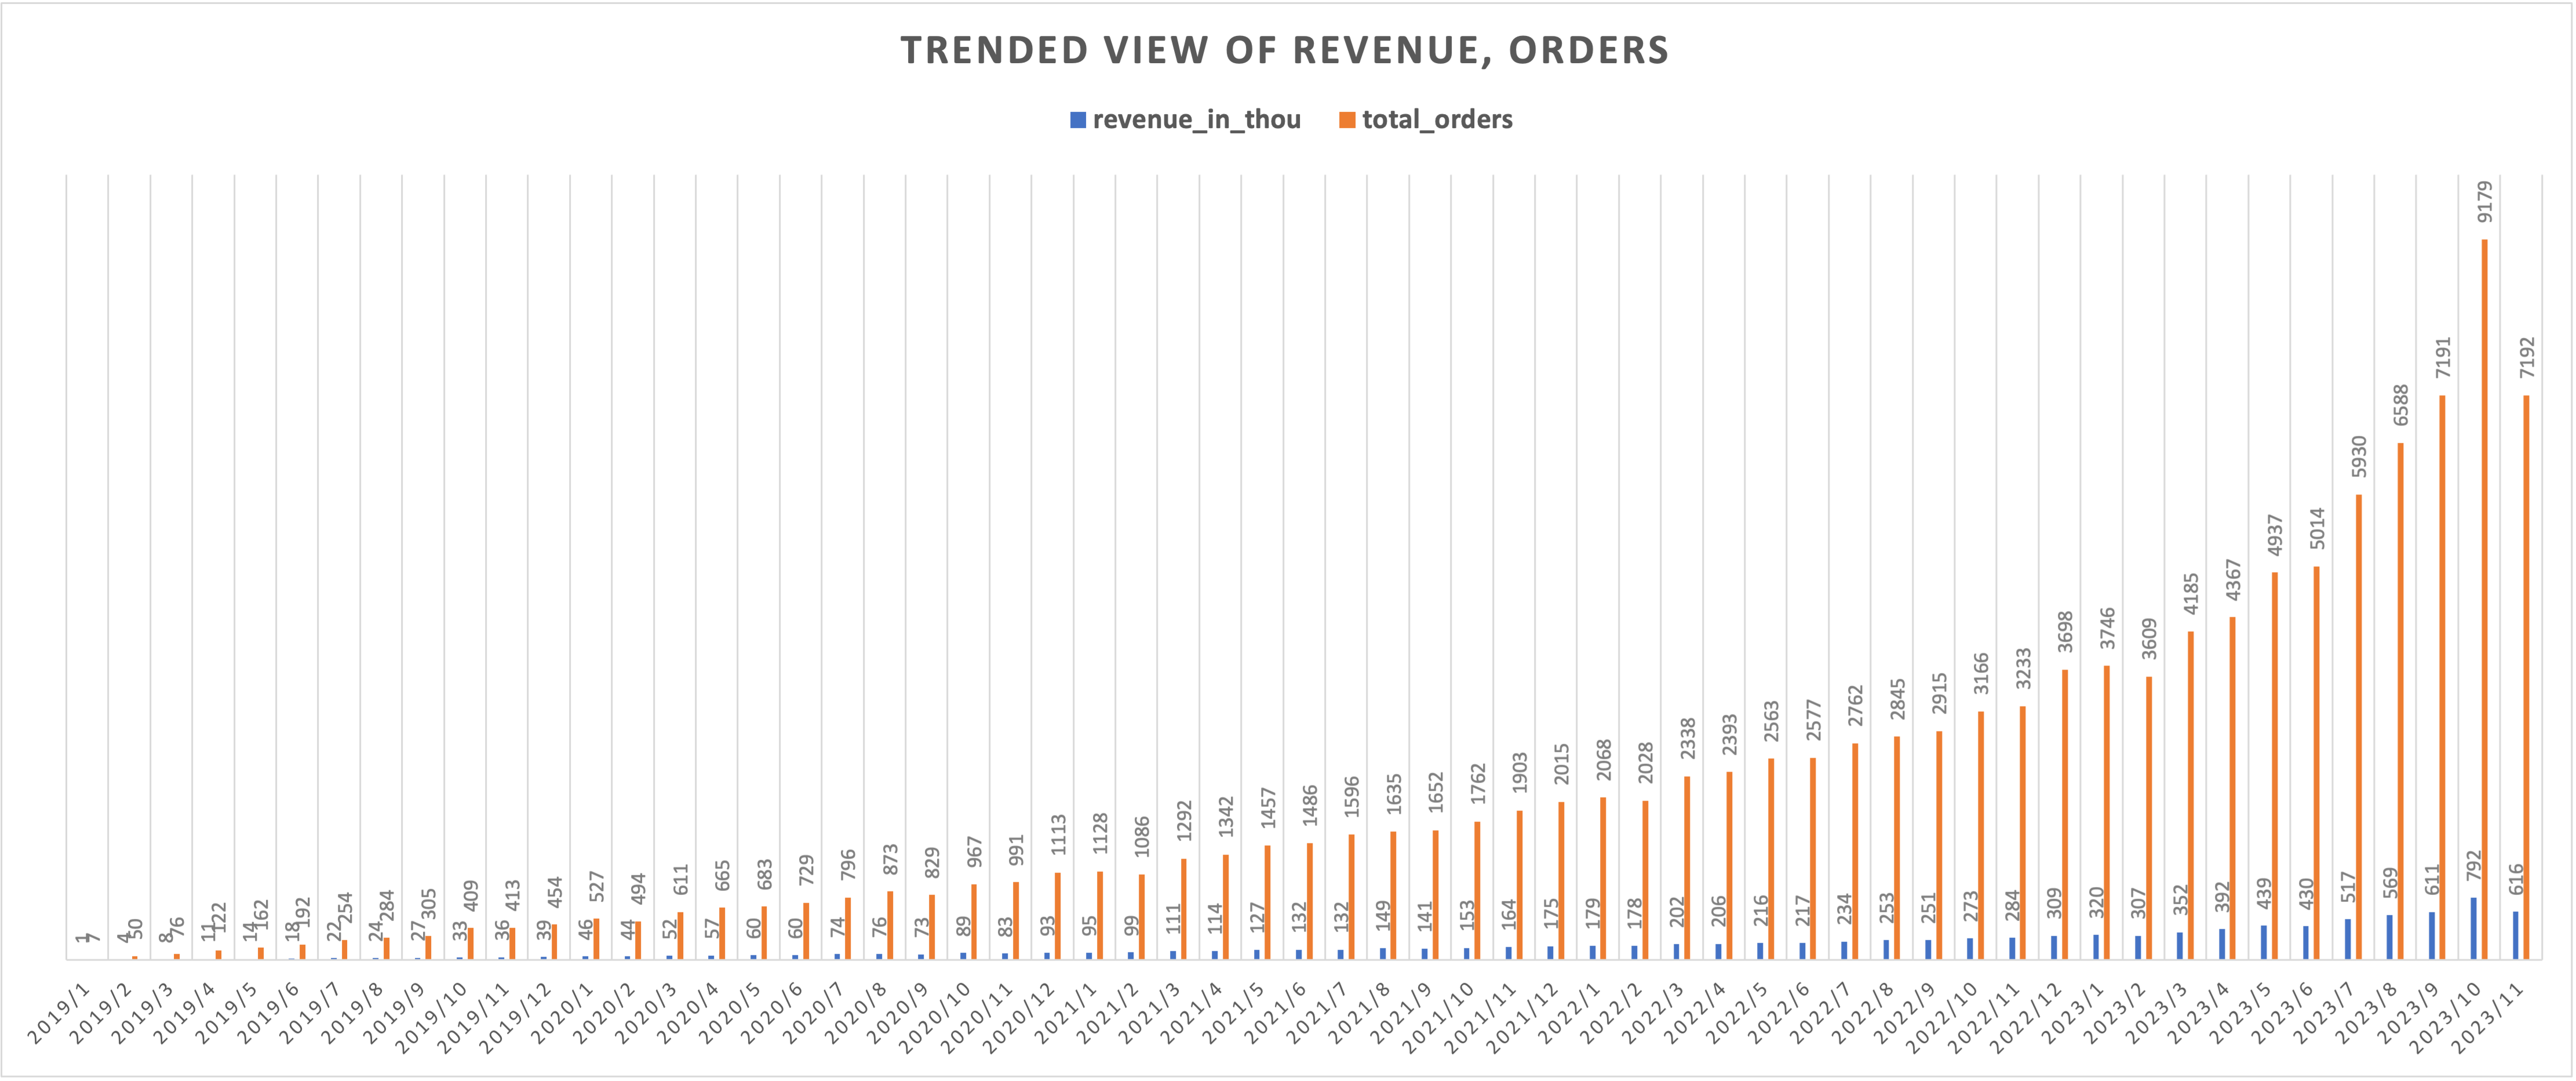

In [8]:
Image(filename= 'image/marketing/BA775_marketing_Q5.png')

In [28]:
%%bigquery
SELECT EXTRACT(YEAR FROM purchase_time ) AS year,
       EXTRACT(MONTH FROM purchase_time ) AS month,
       ROUND(SUM(sale_price)/1000,0) AS revenue_in_thou,
       COUNT(DISTINCT order_id) AS total_orders
FROM ba775-project-b06.ecommerce_final_tables.Marketing
GROUP BY year,month
ORDER BY year DESC, month DESC
LIMIT 12

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,revenue_in_thou,total_orders
0,2023,11,616.0,7192
1,2023,10,792.0,9179
2,2023,9,611.0,7191
3,2023,8,569.0,6588
4,2023,7,517.0,5930
5,2023,6,430.0,5014
6,2023,5,439.0,4937
7,2023,4,392.0,4367
8,2023,3,352.0,4185
9,2023,2,307.0,3609


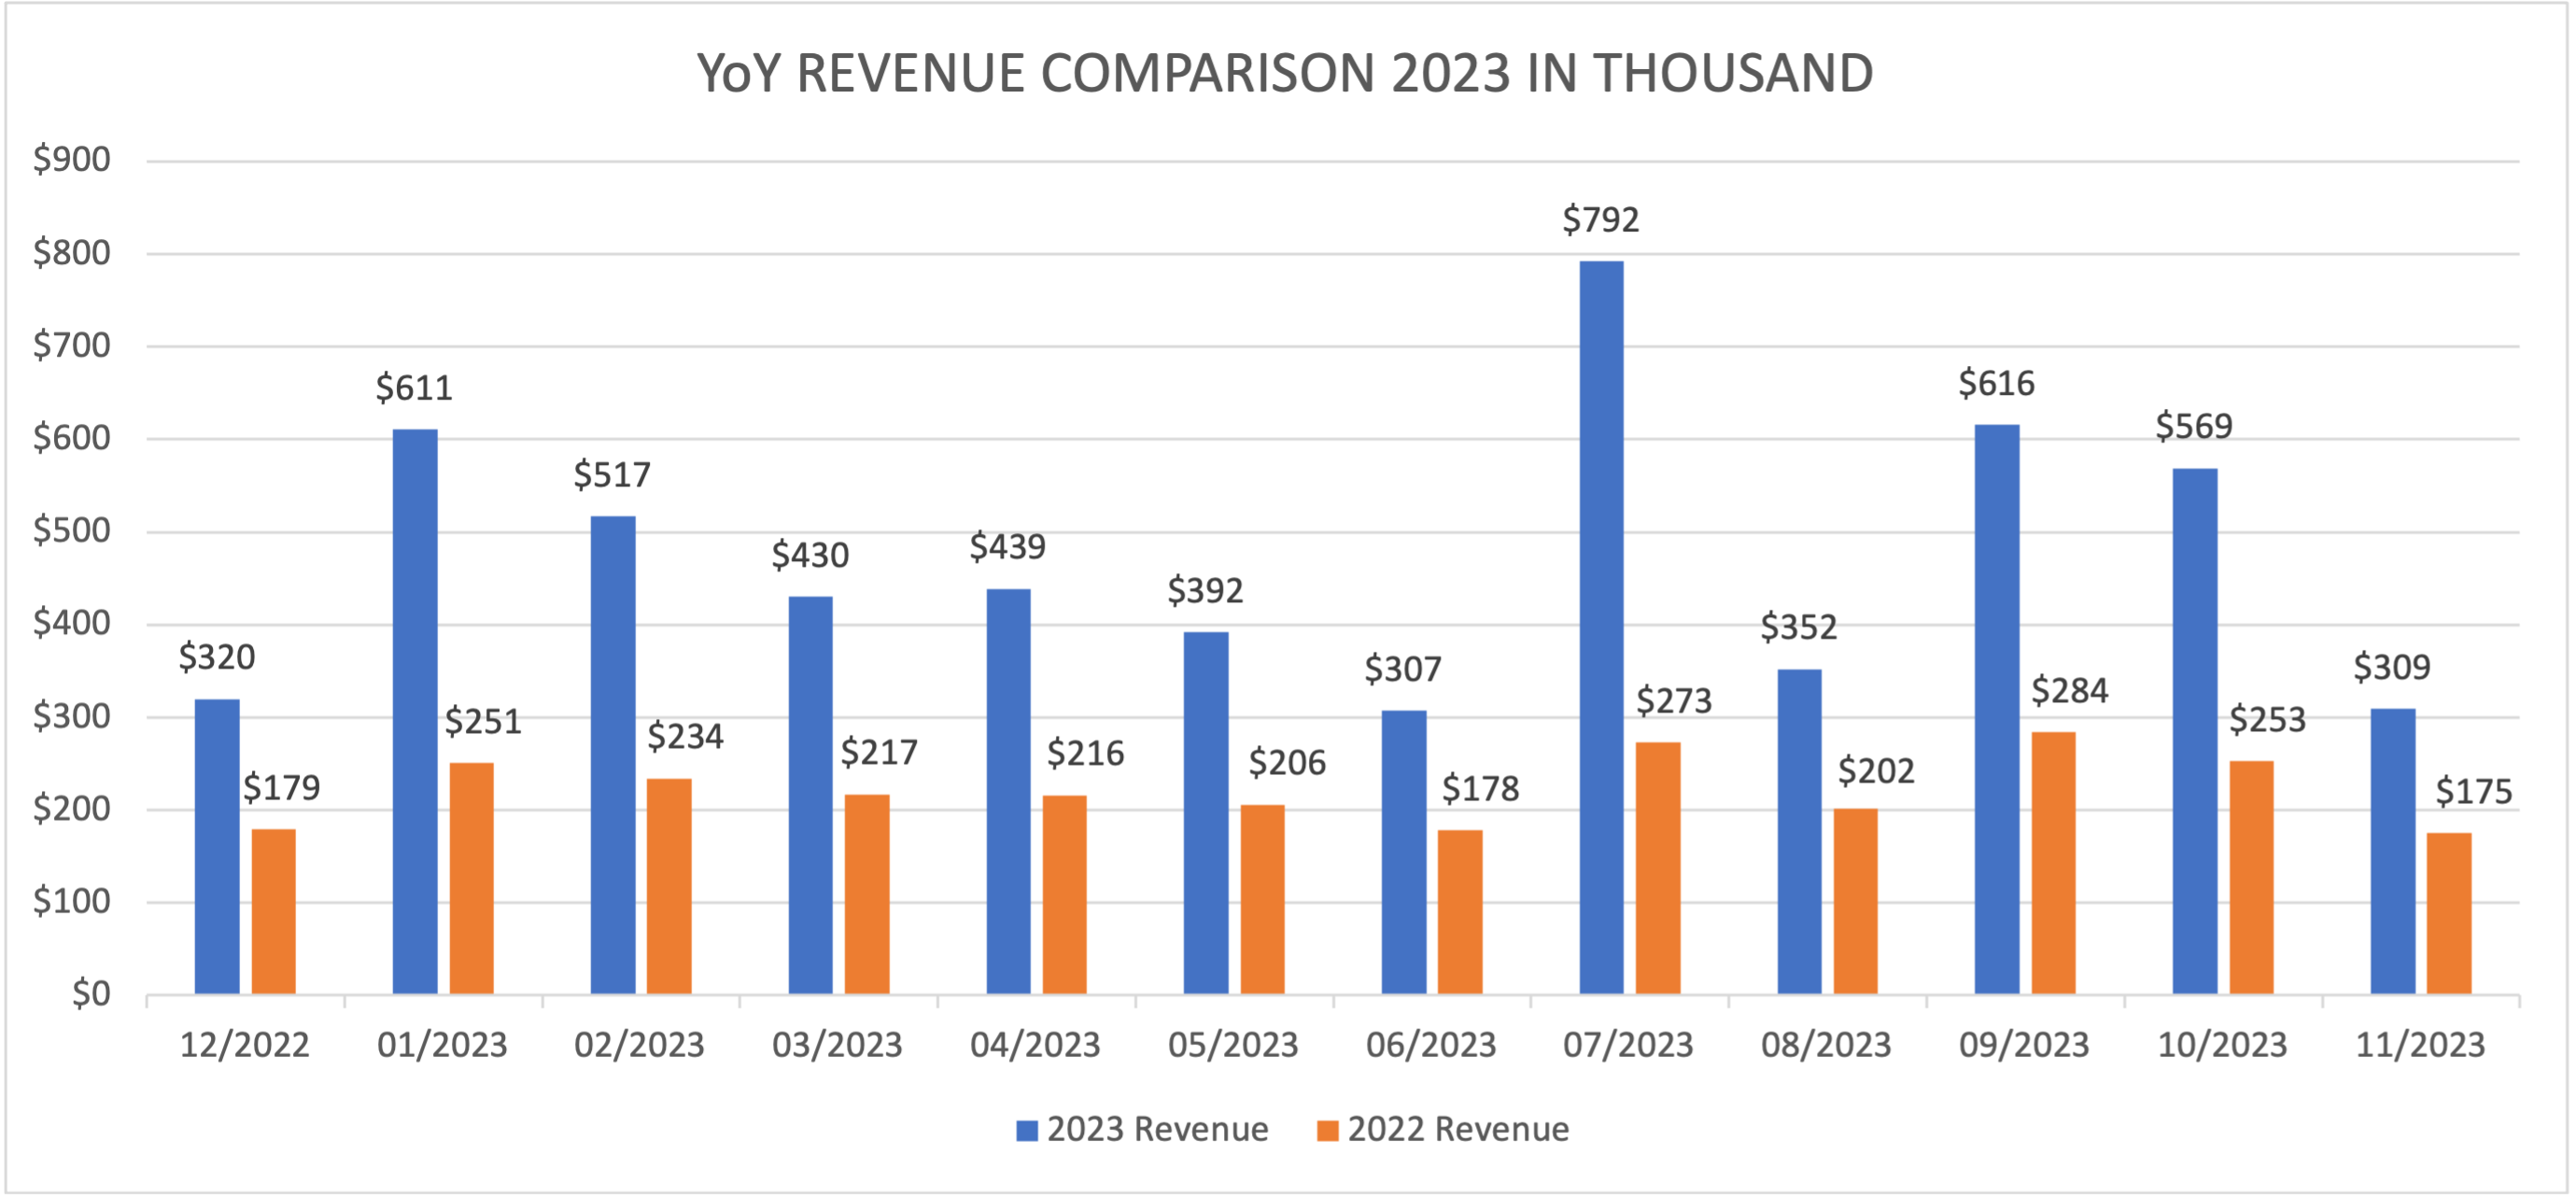

In [12]:
Image(filename='image/marketing/BA775_marketing_Q5.1.png', width= 1000)

In [15]:
%%bigquery
WITH rev_2023 AS(
SELECT EXTRACT(YEAR FROM purchase_time ) AS year,
       EXTRACT(MONTH FROM purchase_time ) AS month,
       ROUND(SUM(sale_price)/1000,0) AS revenue_in_thou,
FROM ba775-project-b06.ecommerce_final_tables.Marketing
GROUP BY year,month
ORDER BY year DESC, month DESC)

SELECT year,
       month, 
       revenue_in_thou, 
       previous_year_rev,
       ROUND((revenue_in_thou- previous_year_rev)/previous_year_rev*100, 2) AS YoY_growth_perc
FROM (SELECT year,
       month, 
       revenue_in_thou, 
       LAG(revenue_in_thou, 12, 1) OVER(ORDER BY year, month) AS previous_year_rev,
FROM rev_2023
ORDER BY year DESC, month DESC) AS subquery
LIMIT 12

Query is running:   0%|          |

Downloading:   0%|          |

,year,month,revenue_in_thou,previous_year_rev,YoY_growth_perc
0,2023,11,616.0,284.0,116.90
1,2023,10,792.0,273.0,190.11
2,2023,9,611.0,251.0,143.43
3,2023,8,569.0,253.0,124.90
4,2023,7,517.0,234.0,120.94
5,2023,6,430.0,217.0,98.16
6,2023,5,439.0,216.0,103.24
7,2023,4,392.0,206.0,90.29
8,2023,3,352.0,202.0,74.26
9,2023,2,307.0,178.0,72.47


#### 3.2.2. Trended QoQ Overview

When comparing the revenue quarter over quarter, we can see a clear seasonality - **fall and summer** seeing increase QoQ. As winter 2023 is still ongoing, we can see the current best performing season is Fall, where orders, items sold, and profit saw almost **250% increase** compared to summer.

In [20]:
%%bigquery
WITH SeasonalSales AS (
  SELECT
    EXTRACT(YEAR FROM created_at) AS order_year,
    CASE
      WHEN EXTRACT(MONTH FROM created_at) IN (12, 1, 2) THEN 'Winter'
      WHEN EXTRACT(MONTH FROM created_at) IN (3, 4, 5) THEN 'Spring'
      WHEN EXTRACT(MONTH FROM created_at) IN (6, 7, 8) THEN 'Summer'
      WHEN EXTRACT(MONTH FROM created_at) IN (9, 10, 11) THEN 'Fall'
    END AS order_season,
    COUNT(DISTINCT order_id) AS total_orders,
    SUM(num_of_item) AS total_items_sold,
    ROUND(SUM(product_cost * num_of_item),2) AS total_cost,
    ROUND(SUM(sale_price * num_of_item),2) AS total_sale,
    ROUND(SUM((sale_price - product_cost) * num_of_item), 2) AS total_profit
  FROM
    `ba775-project-b06.ecommerce_final_tables.Product`
  WHERE status NOT IN ('Cancelled', 'Returned')
  GROUP BY
    order_year, order_season
)

SELECT
  order_year,
  order_season,
  total_profit,
  ROUND((total_orders - LAG(total_orders) OVER (ORDER BY order_year, order_season)) / LAG(total_orders) OVER (ORDER BY order_year, order_season) * 100, 2) AS orders_QoQ_perc,
  ROUND((total_items_sold - LAG(total_items_sold) OVER (ORDER BY order_year, order_season)) / LAG(total_items_sold) OVER (ORDER BY order_year, order_season) * 100, 2) AS items_sold_QoQ_perc,
  ROUND((total_profit - LAG(total_profit) OVER (ORDER BY order_year, order_season)) / LAG(total_profit) OVER (ORDER BY order_year, order_season) * 100, 2) AS profit_QoQ_perc
FROM
  SeasonalSales
ORDER BY
  order_year DESC,
  CASE order_season
        WHEN 'Spring' THEN 4
        WHEN 'Summer' THEN 3
        WHEN 'Fall' THEN 2
        WHEN 'Winter' THEN 1 END

Query is running:   0%|          |

Downloading:   0%|          |

,order_year,order_season,total_profit,orders_QoQ_perc,items_sold_QoQ_perc,profit_QoQ_perc
0,2023,Winter,711735.64,-31.30,-29.77,-30.40
1,2023,Fall,1579016.59,240.17,236.01,243.42
2,2023,Summer,1022551.02,26.53,26.01,26.31
3,2023,Spring,809580.01,-48.55,-49.67,-48.73
4,2022,Winter,459789.37,-11.30,-9.30,-10.04
5,2022,Fall,598876.18,116.98,112.09,124.07
6,2022,Summer,511115.81,18.83,19.79,16.22
7,2022,Spring,439774.36,-24.86,-24.80,-26.57
8,2021,Winter,267276.97,-7.74,-4.19,-4.49
9,2021,Fall,343525.49,148.24,153.20,146.81


### 3.3. What are the 5 most popular categories of products?

Then we will look into our top sellers to for some highlights.

As we can see that he top five most popular product categories, based on quantity sold, are:

1. Intimates

2. Jeans

3. Tops & Tees

4. Fashion Hoodies & Sweatshirts

5. Sleep & Lounge. Intimates. 

18,906 units sold in **Intimates** Category which generated more than 656K dollars in revenue and more than 307k dollars in profit. 

**Jeans**, with 17,679 units sold, produced the highest revenue by 1,722,889.52 dollars and 801,718.63 dollars in profit, which represent the highest Profit Margin comparing to other categories. 

**Tops & Tees**, totaling 17,294 units sold, **Fashion Hoodies & Sweatshirts** and **Sleep & Lounge** followed closely, each showcasing substantial sales figures and corresponding revenue and profit amounts. 

These insights offer a comprehensive overview of the sales performance and financial outcomes based on sold quantities. In next question, we will dive into identifying the brands that have the highest profits.

In [32]:
%%bigquery
SELECT 
  category,
  SUM(num_of_item) AS sold_quantity,
  ROUND(SUM(sale_price * num_of_item), 2) AS revenue,
  ROUND(SUM((sale_price - product_cost) * num_of_item), 2) AS profit
FROM `ba775-project-b06.ecommerce_final_tables.Product` 
WHERE status NOT IN ('Cancelled','Returned')
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,category,sold_quantity,revenue,profit
0,Intimates,19231,637424.37,298800.38
1,Jeans,18511,1848008.80,859232.27
2,Tops & Tees,17047,712354.98,313779.60
3,Fashion Hoodies & Sweatshirts,16912,915432.36,440386.11
4,Shorts,16066,739458.91,369268.11


### 3.4 What are the most popular brands?

Then we will look at our "money-makers" -- the most profitable brands.

Due to the business offering **2755** unique brands, we divided the brands into **100** bins by revenue. The ones that are in bin#1 sees the highest revenues: **Hurley, Joe's Jeans, Volcom, Speedo, Paul Fredrick, Columbia, Ralph Lauren, 7 For All Mankind, Tommy Hilfiger, Orvis, Jones New York, Arc'teryx, Carhartt, Allegra K, True Religion, Calvin Klein, Oakley, Levi's, Diesel, Lucky Brand, Dockers, Mountain Hardwear, G-Star, Nautica, The North Face, Ray-Ban, Quiksilver, Kenneth Cole**

These 28 brands in bin one accounted for **$5.54M** of the revenue, makes up for **27%** of the total sales (see more in appendix)

In [4]:
%%bigquery

WITH brand_bins1 AS
    (WITH brand_bins AS (
        SELECT brand, NTILE(100) OVER (ORDER BY SUM(sale_price * num_of_item) DESC) AS bins
        FROM `ba775-project-b06.ecommerce_final_tables.Product`
        GROUP BY brand)

    SELECT bins, ARRAY_AGG(brand) AS brands 
    FROM brand_bins
    GROUP BY bins
    ORDER BY bins)
    
SELECT bins, ARRAY_AGG(revenue_makers) AS top_10_bins, ROUND(SUM(bin_rev)/1000000,2) AS total_rev_in_mil
FROM(
    SELECT b.bins, p.brand AS revenue_makers, SUM(p.sale_price * p.num_of_item) AS bin_rev
    FROM `ba775-project-b06.ecommerce_final_tables.Product` AS p
    JOIN (SELECT bins, brands 
          FROM brand_bins1 AS b
          WHERE bins <=10
          LIMIT 10
          ) AS b ON p.brand IN UNNEST(b.brands)
    GROUP BY bins, revenue_makers
    ORDER BY bins, revenue_makers) AS sub
GROUP BY bins

Query is running:   0%|          |

Downloading:   0%|          |

,bins,top_10_bins,total_rev_in_mil
0,1,"[7 For All Mankind, Allegra K, Arc'teryx, Calv...",5.54
1,2,"[AG Adriano Goldschmied, American Apparel, Ann...",2.52
2,3,"[A:X Armani Exchange, Alpha Industries, Barbou...",1.67
3,4,"[Affliction, Bali, Ed Garments, Ed Hardy, Evan...",1.14
4,5,"[7 Diamonds, ASICS, Alternative, BCBGeneration...",0.87
5,6,"[Alexander Del Rossa, American Essentials, BGS...",0.75
6,7,"[2(x)ist, 2b by bebe, A Pea in the Pod, Anna-K...",0.66
7,8,"[Adrianna Papell, Alfred Dunner, Alpinestars, ...",0.57
8,9,"[2XU, Antique Rivet, Belly Bandit, Carrera, Ca...",0.51
9,10,"[Abini, Alex Evenings, Anita, BIG STAR, Becca ...",0.45


In [11]:
%%bigquery
CREATE TABLE IF NOT EXISTS ba775-project-b06.ecommerce_final_tables.brand_bins_for_tableau AS
WITH brand_bins1 AS
    (WITH brand_bins AS (
        SELECT brand, NTILE(100) OVER (ORDER BY SUM(sale_price * num_of_item) DESC) AS bins
        FROM `ba775-project-b06.ecommerce_final_tables.Product`
        GROUP BY brand)

    SELECT bins, ARRAY_AGG(brand) AS brands 
    FROM brand_bins
    GROUP BY bins
    ORDER BY bins)
    
SELECT b.bins, p.brand AS revenue_makers, (p.sale_price * p.num_of_item) AS revenue
    FROM `ba775-project-b06.ecommerce_final_tables.Product` AS p
    JOIN (SELECT bins, brands 
          FROM brand_bins1 AS b
          ) AS b ON p.brand IN UNNEST(b.brands)
    ORDER BY bins, brand

Query is running:   0%|          |

""


### 3.5 What do our most valuable customers look like?

Overall, we see that the customers are pretty evenly distributed across our seven age groups. However, we do see slightly higher ratio in the groups follow. 

Additionally, to further break down the 'valuable customers' , we categorized them into:
- **Revenue contributor**: top 30% users of the total revenue
- **Frequent purchaser**: top 30% users with the highest cumulative purchases

#### 3.5.1 Revenue Contributor

As is shown below, most **revenue contributors** are from **China, the US and Brasil**.

Among which **male** consumers takes the majority (just a little over 50%).

And the highest age group are **35-44 for China**, **55-64 for US** and **35-44 for Brasil**.

In [34]:
%%bigquery

# THE OVERALL REVENUE CONTRIBUTOR
WITH 
    revenue_contributor AS(
        SELECT user_id,
        CASE
            WHEN age < 18 THEN '< 18'
            WHEN age BETWEEN 18 AND 24 THEN '18-24'
            WHEN age BETWEEN 25 AND 34 THEN '25-34'
            WHEN age BETWEEN 35 AND 44 THEN '35-44'
            WHEN age BETWEEN 45 AND 54 THEN '45-54'
            WHEN age BETWEEN 55 AND 64 THEN '55-64'
            ELSE '> 65'
        END AS age_category,
        gender, country, SUM(sale_price) AS total_payment,
        NTILE(10) OVER (ORDER BY SUM(sale_price)) AS purchase_bin
        FROM ba775-project-b06.ecommerce_final_tables.marketing_table
        GROUP BY user_id, age_category, gender, country), 
    age_cat_count AS(
        SELECT country, age_category, COUNT(*) AS count
        FROM revenue_contributor
        GROUP BY country, age_category
        ORDER BY count DESC),
    total_count AS(
        SELECT country, SUM(count) AS total_count
        FROM age_cat_count
        GROUP BY country),
    age_cat_perc AS(
        SELECT a.country, a.age_category, a.count, (a.count * 100.0 / b.total_count) AS percentage
        FROM age_cat_count a
        JOIN total_count b ON a.country = b.country),
    age_cat_rank AS(
        SELECT *, RANK() OVER (PARTITION BY country ORDER BY percentage DESC) as rank
        FROM age_cat_perc),
    age_cat_1st AS(
        SELECT country, age_category, percentage
        FROM age_cat_rank
        WHERE rank = 1
        ORDER BY country)

SELECT 
    A.country, 
    ROUND((SUM(CASE WHEN gender = 'F' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS female_percentage,
    COUNT(*) AS num_of_rev_contr,
    B.age_category AS highest_age_cat,
    ROUND(B.percentage, 2) AS age_cat_percentage
FROM revenue_contributor A
JOIN age_cat_1st B
USING (country)
WHERE A.purchase_bin IN (7,8,9)
GROUP BY  country, B.age_category, B.percentage
ORDER BY num_of_rev_contr DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,country,female_percentage,num_of_rev_contr,highest_age_cat,age_cat_percentage
0,China,48.75,8048,35-44,17.49
1,United States,48.79,5460,55-64,17.41
2,Brasil,48.34,3546,45-54,17.18
3,South Korea,51.03,1307,45-54,18.40
4,France,49.00,1155,55-64,17.67


#### 3.5.2 Frequent Buyer

Most of the *frequent buyer* are again from **China, the US and Brasil**, with China again being far ahead.

Among which female consumers take up higher percentages in **China, around 65%** and for the US and Brasil, it's about 50/50

And the highest age group are **35-54 for both China, the US and Brasil**.

In [35]:
%%bigquery

# THE FREQUENT BUYER
WITH 
    frequent_buyer AS(
        SELECT user_id,
        CASE
            WHEN age < 18 THEN '< 18'
            WHEN age BETWEEN 18 AND 24 THEN '18-24'
            WHEN age BETWEEN 25 AND 34 THEN '25-34'
            WHEN age BETWEEN 35 AND 44 THEN '35-44'
            WHEN age BETWEEN 45 AND 54 THEN '45-54'
            WHEN age BETWEEN 55 AND 64 THEN '55-64'
            ELSE '> 65'
        END AS age_category,
        gender, country, COUNT(purchase_time) AS num_of_purchase,
        NTILE(10) OVER (ORDER BY COUNT(purchase_time)) AS frequency_bin 
        FROM ba775-project-b06.ecommerce_final_tables.marketing_table
        GROUP BY user_id, age_category, gender, country), 
    age_cat_count AS(
        SELECT country, age_category, COUNT(*) AS count
        FROM frequent_buyer
        GROUP BY country, age_category
        ORDER BY count DESC),
    total_count AS(
        SELECT country, SUM(count) AS total_count
        FROM age_cat_count
        GROUP BY country),
    age_cat_perc AS(
        SELECT a.country, a.age_category, a.count, (a.count * 100.0 / b.total_count) AS percentage
        FROM age_cat_count a
        JOIN total_count b ON a.country = b.country),
    age_cat_rank AS(
        SELECT *, RANK() OVER (PARTITION BY country ORDER BY percentage DESC) as rank
        FROM age_cat_perc),
    age_cat_1st AS(
        SELECT country, age_category, percentage
        FROM age_cat_rank
        WHERE rank = 1
        ORDER BY country)

SELECT 
    A.country, 
    ROUND((SUM(CASE WHEN gender = 'F' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS female_percentage,
    COUNT(*) AS num_of_freq_buyer,
    B.age_category AS highest_age_cat,
    ROUND(B.percentage, 2) AS age_cat_percentage
FROM frequent_buyer A
JOIN age_cat_1st B
USING (country)
WHERE frequency_bin IN (7,8,9)
GROUP BY country, B.age_category, B.percentage
ORDER BY num_of_freq_buyer DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,country,female_percentage,num_of_freq_buyer,highest_age_cat,age_cat_percentage
0,China,50.31,6383,35-44,17.49
1,United States,49.55,5592,55-64,17.41
2,Brasil,50.33,4093,45-54,17.18
3,France,51.31,1639,55-64,17.67
4,South Korea,51.59,1539,45-54,18.40


### 3.6 Are there any significant variances in seasonality, age groups and gender among our customers, if so, among which categories?

Inside these groups of customers, what are they most interest in? We will look into the order data of different age groups and genders to get a fuller portrait of the customers, and the seasonality of consumption for some references.

#### 3.6.1 Seasonality consumption by category

By looking at the variance between four seasons, we can see that the categories that see the most variance between seasons are the ones that see the least orders: ranked 26, 25, 22, 15, 19 out of 26 total categories. 

This is great news as our best-selling categories see less variance comparatively, and are evergreen products. 

In [160]:
%%bigquery
WITH base_table AS(
    SELECT
      category,
      RANK() OVER(ORDER BY COUNT(DISTINCT order_id) DESC) AS order_count_rank,
      ROUND(COUNT(DISTINCT CASE WHEN EXTRACT(MONTH FROM created_at) IN (2,3,4) THEN order_id END) / COUNT(DISTINCT order_id), 2) AS spring_order_perc,
      ROUND(COUNT(DISTINCT CASE WHEN EXTRACT(MONTH FROM created_at) IN (5,6,7) THEN order_id END) / COUNT(DISTINCT order_id), 2) AS summer_order_perc,
      ROUND(COUNT(DISTINCT CASE WHEN EXTRACT(MONTH FROM created_at) IN (8,9,10) THEN order_id END) / COUNT(DISTINCT order_id), 2) AS autumn_order_perc,
      ROUND(COUNT(DISTINCT CASE WHEN EXTRACT(MONTH FROM created_at) IN (11,12,1) THEN order_id END) / COUNT(DISTINCT order_id), 2) AS winter_order_perc,
    FROM `ba775-project-b06.ecommerce_final_tables.Products`
    WHERE status NOT IN ('Cancelled','Returned')
    GROUP BY category
    ORDER BY order_count_rank)

SELECT category, order_count_rank, 
        SQRT(
        (spring_order_perc - AVG(spring_order_perc) OVER()) * (spring_order_perc - AVG(spring_order_perc) OVER()) +
        (summer_order_perc - AVG(summer_order_perc) OVER()) * (summer_order_perc - AVG(summer_order_perc) OVER()) +
        (autumn_order_perc - AVG(autumn_order_perc) OVER()) * (autumn_order_perc - AVG(autumn_order_perc) OVER()) +
        (winter_order_perc - AVG(winter_order_perc) OVER()) * (winter_order_perc - AVG(winter_order_perc) OVER())
    ) AS variance_between_seasons, spring_order_perc, summer_order_perc, autumn_order_perc, winter_order_perc,
FROM base_table
ORDER BY variance_between_seasons DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,category,order_count_rank,variance_between_seasons,spring_order_perc,summer_order_perc,autumn_order_perc,winter_order_perc
0,Clothing Sets,26,0.068270,0.19,0.22,0.37,0.22
1,Jumpsuits & Rompers,25,0.033844,0.22,0.22,0.30,0.25
2,Leggings,22,0.026298,0.19,0.26,0.30,0.24
3,Dresses,15,0.021105,0.19,0.24,0.33,0.24
4,Socks & Hosiery,19,0.021105,0.19,0.24,0.33,0.24
5,Plus,18,0.019593,0.19,0.25,0.30,0.26
6,Skirts,23,0.019395,0.20,0.23,0.30,0.26
7,Pants & Capris,20,0.016386,0.20,0.24,0.30,0.26
8,Maternity,16,0.016386,0.20,0.25,0.30,0.25
9,Blazers & Jackets,21,0.015666,0.19,0.25,0.31,0.24


Additionally, we can observe clear seasonal trends, with autumn being identified as the peak. The number of orders in autumn is significantly higher than other seasons, indicating that consumers are more inclined to purchase products at this time. 

#### 3.6.2 Distribution of different age groups

Seeing the order count distribution across six age groups, we see the categories with significant age group preferences being the worst-selling ones: 25, 24, 26, 23, 19. This again speaks to our top-selling categories.

It's worth to mention that the general upticks are in the **25 to 34** age group, hence, we hope to analyze this population's preference for further leverage in revenue.

In [21]:
%%bigquery
WITH base_table AS
    (SELECT
      category,
      RANK() OVER(ORDER BY COUNT(DISTINCT order_id) DESC) AS order_count_rank,
      ROUND(COUNT(DISTINCT CASE WHEN age < 18 THEN  order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_under18,
      ROUND(COUNT(DISTINCT CASE WHEN age BETWEEN 18 AND 24 THEN order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_18to24,
      ROUND(COUNT(DISTINCT CASE WHEN age BETWEEN 25 AND 34 THEN order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_25to34,
      ROUND(COUNT(DISTINCT CASE WHEN age BETWEEN 35 AND 44 THEN order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_35to44,
      ROUND(COUNT(DISTINCT CASE WHEN age BETWEEN 45 AND 54 THEN order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_45to54,
      ROUND(COUNT(DISTINCT CASE WHEN age BETWEEN 55 AND 64 THEN order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_55to64,
      ROUND(COUNT(DISTINCT CASE WHEN age >= 65  THEN order_id END) / COUNT(DISTINCT order_id) * 100, 2) AS perc_above65,
    FROM ba775-project-b06.ecommerce_final_tables.Products
    WHERE status NOT IN ('Cancelled', 'Returned') 
    GROUP BY category
    ORDER BY order_count_rank DESC)

SELECT category, order_count_rank, 
        SQRT(
        (perc_under18 - AVG(perc_under18) OVER()) * (perc_under18 - AVG(perc_under18) OVER()) +
        (perc_18to24 - AVG(perc_18to24) OVER()) * (perc_18to24 - AVG(perc_18to24) OVER()) +
        (perc_25to34 - AVG(perc_25to34) OVER()) * (perc_25to34 - AVG(perc_25to34) OVER()) +
        (perc_35to44 - AVG(perc_35to44) OVER()) * (perc_35to44 - AVG(perc_35to44) OVER()) +
        (perc_45to54 - AVG(perc_45to54) OVER()) * (perc_45to54 - AVG(perc_45to54) OVER()) +
        (perc_55to64 - AVG(perc_55to64) OVER()) * (perc_55to64 - AVG(perc_55to64) OVER()) +
        (perc_above65 - AVG(perc_above65) OVER()) * (perc_above65 - AVG(perc_above65) OVER())
    ) AS variance_between_age, perc_under18, perc_18to24, perc_25to34, perc_35to44, perc_45to54, perc_55to64, perc_above65, 
FROM base_table
ORDER BY variance_between_age DESC
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,category,order_count_rank,variance_between_age,perc_under18,perc_18to24,perc_25to34,perc_35to44,perc_45to54,perc_55to64,perc_above65
0,Jumpsuits & Rompers,25,4.354424,10.17,10.62,20.03,15.63,18.82,15.48,9.26
1,Suits,24,3.933224,11.03,9.96,17.20,19.69,15.66,15.78,10.68
2,Clothing Sets,26,3.911459,11.31,11.31,16.07,14.29,19.05,18.45,9.52
3,Skirts,23,2.688873,10.67,11.99,17.79,14.62,17.19,16.60,11.13
4,Socks & Hosiery,19,1.594570,10.26,11.53,17.19,15.96,16.50,17.59,10.95


**25-34 age group:**

In [22]:
%%bigquery

WITH brands AS(
    SELECT category,brand,COUNT(DISTINCT order_id) AS order_count,
        ROUND(COUNT(DISTINCT order_id) / NULLIF(SUM(COUNT(DISTINCT order_id)) OVER (PARTITION BY category), 0) *100,2) AS brand_percentage
  FROM ba775-project-b06.ecommerce_final_tables.Products
  WHERE category IN ('Intimates', 'Tops & Tees', 'Fashion Hoodies & Sweatshirts', 'Jeans', 'Shorts')
  AND age BETWEEN 25 AND 34 AND status NOT IN ('Cancelled','Returned')
  GROUP BY category, brand
  ORDER BY order_count DESC)

SELECT category, brand, brand_percentage,
FROM
    (SELECT category, 
       brand, 
       brand_percentage,
       RANK() OVER(PARTITION BY category ORDER BY brand_percentage DESC) AS brand_rank
FROM brands) AS subquery
WHERE brand_rank <=3
ORDER BY category,brand_rank 

Query is running:   0%|          |

Downloading:   0%|          |

,category,brand,brand_percentage
0,Fashion Hoodies & Sweatshirts,Allegra K,6.31
1,Fashion Hoodies & Sweatshirts,DC,3.75
2,Fashion Hoodies & Sweatshirts,Volcom,3.62
3,Intimates,Maidenform,2.74
4,Intimates,Vanity Fair,2.74
5,Intimates,Bali,2.74
6,Jeans,Wrangler,8.37
7,Jeans,Levi's,7.38
8,Jeans,7 For All Mankind,7.11
9,Shorts,Allegra K,5.39


This set of data shows the proportion of the top five brands among the five most purchased categories by consumers in the 25-34 age group.
From the data we can see that Allegra K is a well-known brand and it performs well in multiple categories such as in the Fashion Hoodies & Sweatshirts and Tops & Tees category where the brand percentage is respectively 6.31% and 3.91%. This shows that Allegra K has a relatively rich product line and a loyal customer base.

In the "Intimates" category, several brands including Bali, Vanity Fair, Maidenform, Wacoal and Flexees have similar brand ratios. This suggests that these brands have a relatively even distribution of consumer preferences in the intimate apparel segment. The market is more fragmented, and consumers have different brand preferences in this specific market segment, which also means that there is still room for these brands to optimize products and increase market share.

#### 3.6.3 The gender preference of different categories

Due to certain categories unique to Man and Woman departments, we see some the variances between 16 categories' purchase having 100% male/female purchasers.

After realizing that, we filtered out the categories that see exclusive female or male customers. After which, some of the categories that see biggest variance in order counts are **Swim, Outerwear & Coats, and Tops & Tees**. 

In [26]:
%%bigquery
WITH base_table AS(
    SELECT category,
      RANK() OVER(ORDER BY COUNT(DISTINCT order_id) DESC) AS order_count_rank,
      ROUND(COUNT(DISTINCT CASE WHEN gender = 'F' THEN order_id END) / COUNT(DISTINCT order_id), 2) AS female_order_perc,
      ROUND(COUNT(DISTINCT CASE WHEN gender = 'M' THEN order_id END) / COUNT(DISTINCT order_id), 2) AS male_order_perc
    FROM
      ba775-project-b06.ecommerce_final_tables.Products
    WHERE status NOT IN ('Cancelled','Returned')
    GROUP BY category
    ORDER BY order_count_rank DESC)

SELECT category, order_count_rank,
        SQRT(
        (female_order_perc - AVG(female_order_perc) OVER()) * (female_order_perc - AVG(female_order_perc) OVER()) +
        (male_order_perc - AVG(male_order_perc) OVER()) * (male_order_perc - AVG(male_order_perc) OVER())
        ) AS variance_between_gender, female_order_perc
FROM base_table
WHERE category NOT IN ('Socks', 'Suits & Sport Coats', 'Underwear', 'Blazers & Jackets', 'Clothing Sets',
                       'Dresses', 'Intimates', 'Jumpsuits & Rompers', 'Leggings', 'Maternity', 'Pants & Capris',
                       'Plus', 'Skirts','Socks & Hosiery','Suits', 'Pants')
ORDER BY variance_between_gender DESC

Query is running:   0%|          |

Downloading:   0%|          |

,category,order_count_rank,variance_between_gender,female_order_perc
0,Swim,7,0.055154,0.45
1,Outerwear & Coats,11,0.043841,0.38
2,Tops & Tees,3,0.043841,0.38
3,Sweaters,8,0.043841,0.38
4,Accessories,9,0.026870,0.43
5,Fashion Hoodies & Sweatshirts,4,0.026870,0.43
6,Jeans,2,0.015556,0.40
7,Sleep & Lounge,5,0.012728,0.42
8,Active,10,0.012728,0.42
9,Shorts,6,0.012728,0.42


**Preference among females:**

In [157]:
%%bigquery

WITH brands1 AS(
    SELECT category,brand, COUNT(DISTINCT order_id) AS order_count,
    ROUND(COUNT(DISTINCT order_id) / NULLIF(SUM(COUNT(DISTINCT order_id)) OVER (PARTITION BY category), 0) *100,2) AS brand_percentage
  FROM ba775-project-b06.ecommerce_final_tables.Products
  WHERE
    category IN ('Intimates','Dresses', 'Maternity', 'Swim', 'Fashion Hoodies & Sweatshirts')
  AND gender ='F'
  AND status NOT IN ('Cancelled','Returned')
  GROUP BY category, brand
  ORDER BY order_count DESC)

SELECT category, brand,brand_percentage,
FROM
    (SELECT category, 
       brand, 
       brand_percentage,
       RANK() OVER(PARTITION BY category ORDER BY brand_percentage DESC) AS brand_rank
FROM brands1) AS subquery
WHERE brand_rank <=3
ORDER BY category,brand_rank 

Query is running:   0%|          |

Downloading:   0%|          |

,category,brand,brand_percentage
0,Dresses,Allegra K,13.63
1,Dresses,Hot from Hollywood,4.89
2,Dresses,BCBGMAXAZRIA,3.09
3,Fashion Hoodies & Sweatshirts,Allegra K,8.96
4,Fashion Hoodies & Sweatshirts,Roxy,4.83
5,Fashion Hoodies & Sweatshirts,Fox,4.56
6,Intimates,Bali,3.05
7,Intimates,Maidenform,2.83
8,Intimates,Hanes,2.75
9,Maternity,Motherhood Maternity,19.28


The data presented here helps us understand the sales performance of popular categories and brands focused on female consumers. In the dresses category, Allegra k's sales are very outstanding. In the swim category, speedo occupies a leading position and is deeply loved by consumers. Among fashion hoodies & sweatshirts, Allegra k once again occupies the main market. In the intimates category, Bali performs more prominently than other brands. Maternity's consumers are all women, among which the motherhood maternity brand performs best, accounting for 20% of the market.

**Preference among males:**

In [158]:
%%bigquery

WITH brands1 AS(
    SELECT category,brand,COUNT(DISTINCT order_id) AS order_count,
        ROUND(COUNT(DISTINCT order_id) / NULLIF(SUM(COUNT(DISTINCT order_id)) OVER (PARTITION BY category), 0) *100,2) AS brand_percentage
  FROM ba775-project-b06.ecommerce_final_tables.Products
  WHERE
    category IN ('Underwear','Jeans', 'Tops & Tees', 'Pants', 'Sweaters')
  AND gender ='M'
  AND status NOT IN ('Cancelled','Returned')
  GROUP BY category, brand
  ORDER BY order_count DESC)

SELECT category, brand, brand_percentage,
FROM
    (SELECT category, brand, brand_percentage, RANK() OVER(PARTITION BY category ORDER BY brand_percentage DESC) AS brand_rank
FROM brands1) AS subquery
WHERE brand_rank <=3
ORDER BY category,brand_rank 

Query is running:   0%|          |

Downloading:   0%|          |

,category,brand,brand_percentage
0,Jeans,Wrangler,11.11
1,Jeans,7 For All Mankind,8.25
2,Jeans,Diesel,6.16
3,Pants,Dockers,8.83
4,Pants,Allegra K,8.42
5,Pants,Haggar,6.44
6,Sweaters,The Little Alpaca's House,4.52
7,Sweaters,Tommy Hilfiger,4.13
8,Sweaters,Allegra K,3.76
9,Tops & Tees,Carhartt,4.65


These data include the top ten brands and their market share in the most popular categories among men. In the sweater category, Calvin Klein and The Little Alpaca's House take the lead. In the pants category, Dockers tops the list with 632 orders. In the tops&tees category, Carhartt leads the way with 348 orders. In the underwear category, calvinklein and Hanes sell the most. In the jeans category, Wrangler was the top performing brand with 801 orders received.

These brands that are in the leading position in sales may have strong market appeal or effective marketing strategies, which are also things that relatively weak brands need to learn and improve. The data shows a diverse range of brands, indicating fierce competition in the market. At the same time, understanding different gender‘s fashion and preference trends and understanding the popularity of specific styles within each category can guide inventory and marketing decisions.

### 3.7 What are the best marketing channels for different events?

After getting all this information about different customer buying different products, we will discover how its done. What is the marketing channels the company has been using and which of them are the best in drawing traffics for the company.

By looking at the unique marketing channels: Email, Facebook, Adwords, YouTube, Organic, we noticed that they can be divided into paid marketing channels and organic marketing channels.
- Paid marketing channels:  Facebook, Adwords, YouTube
- Organic marketing channels: Email, Organic

**Email and Adwords** among all traffic sources drew most of the total traffics, followed by Facebook, YouTube and Organic.

**department, cart and product** among all event types have the highest percentage within each traffic source, followed by purchase and home. The percentages are very similar to each other within the same event type.

In [71]:
%%bigquery

# TRAFFIC SOURCE & EVENT TYPE
SELECT 
    event_type,
    COUNT(*) AS total_event,
    ROUND((SUM(CASE WHEN traffic_source = 'Email' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS Email_percentage,
    ROUND((SUM(CASE WHEN traffic_source = 'Adwords' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS Adwords_percentage,
    ROUND((SUM(CASE WHEN traffic_source = 'Facebook' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS Facebook_percentage,
    ROUND((SUM(CASE WHEN traffic_source = 'YouTube' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS YouTube_percentage,
    ROUND((SUM(CASE WHEN traffic_source = 'Organic' THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS Organic_percentage
FROM
    ba775-project-b06.ecommerce_final_tables.marketing_table
GROUP BY
    event_type
ORDER BY
    total_event DESC

Query is running:   0%|          |

Downloading:   0%|          |

,event_type,total_event,Email_percentage,Adwords_percentage,Facebook_percentage,YouTube_percentage,Organic_percentage
0,department,47975,45.70,29.93,10.04,9.67,4.67
1,product,47840,46.54,29.89,9.73,9.07,4.77
2,cart,47838,46.17,29.68,9.75,9.52,4.88
3,purchase,25340,45.56,29.54,10.01,9.95,4.94
4,home,12240,47.09,28.55,10.30,9.39,4.67


### 3.8 Which channels have the highest conversion rate?

To dig further on the company's marketing strategy performances, we will look into the conversion rate of each channel.

Following the marketing funnel, we can divide the `event_types` into three stages: *Awareness, Consideration* and *Conversion* :
- Awareness : `home`
- Consideration: `department`, `product`, `cart`
- Conversion: `purchase`

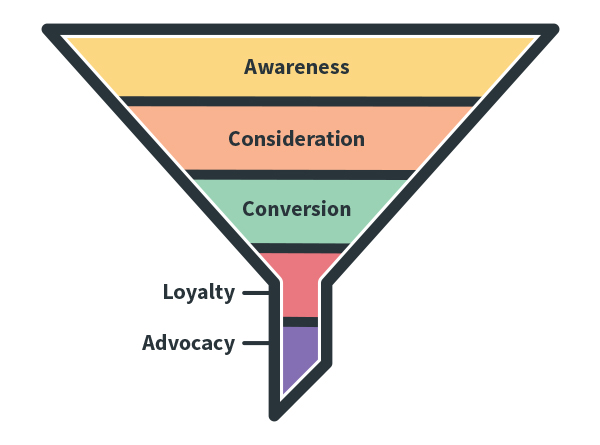

In [46]:
Image(filename='image/marketing/marketing-funnel.jpeg')

By looking at the *purchase counts / total event counts*, we noticed that **YouTube** has the highest conversion rate at 14.66%, followed by **Organic** media. 

Although **Email** and **Adwords** have the lowest conversion rate, their total amount of conversions are large. **Email**, for example, makes up for 46% of the total conversion events. 

Given that email is an organic channel, we should prioritize the quality of marketing contents here, followed by AdWords, as it's typically the channel that drives through the customers before conversions. 

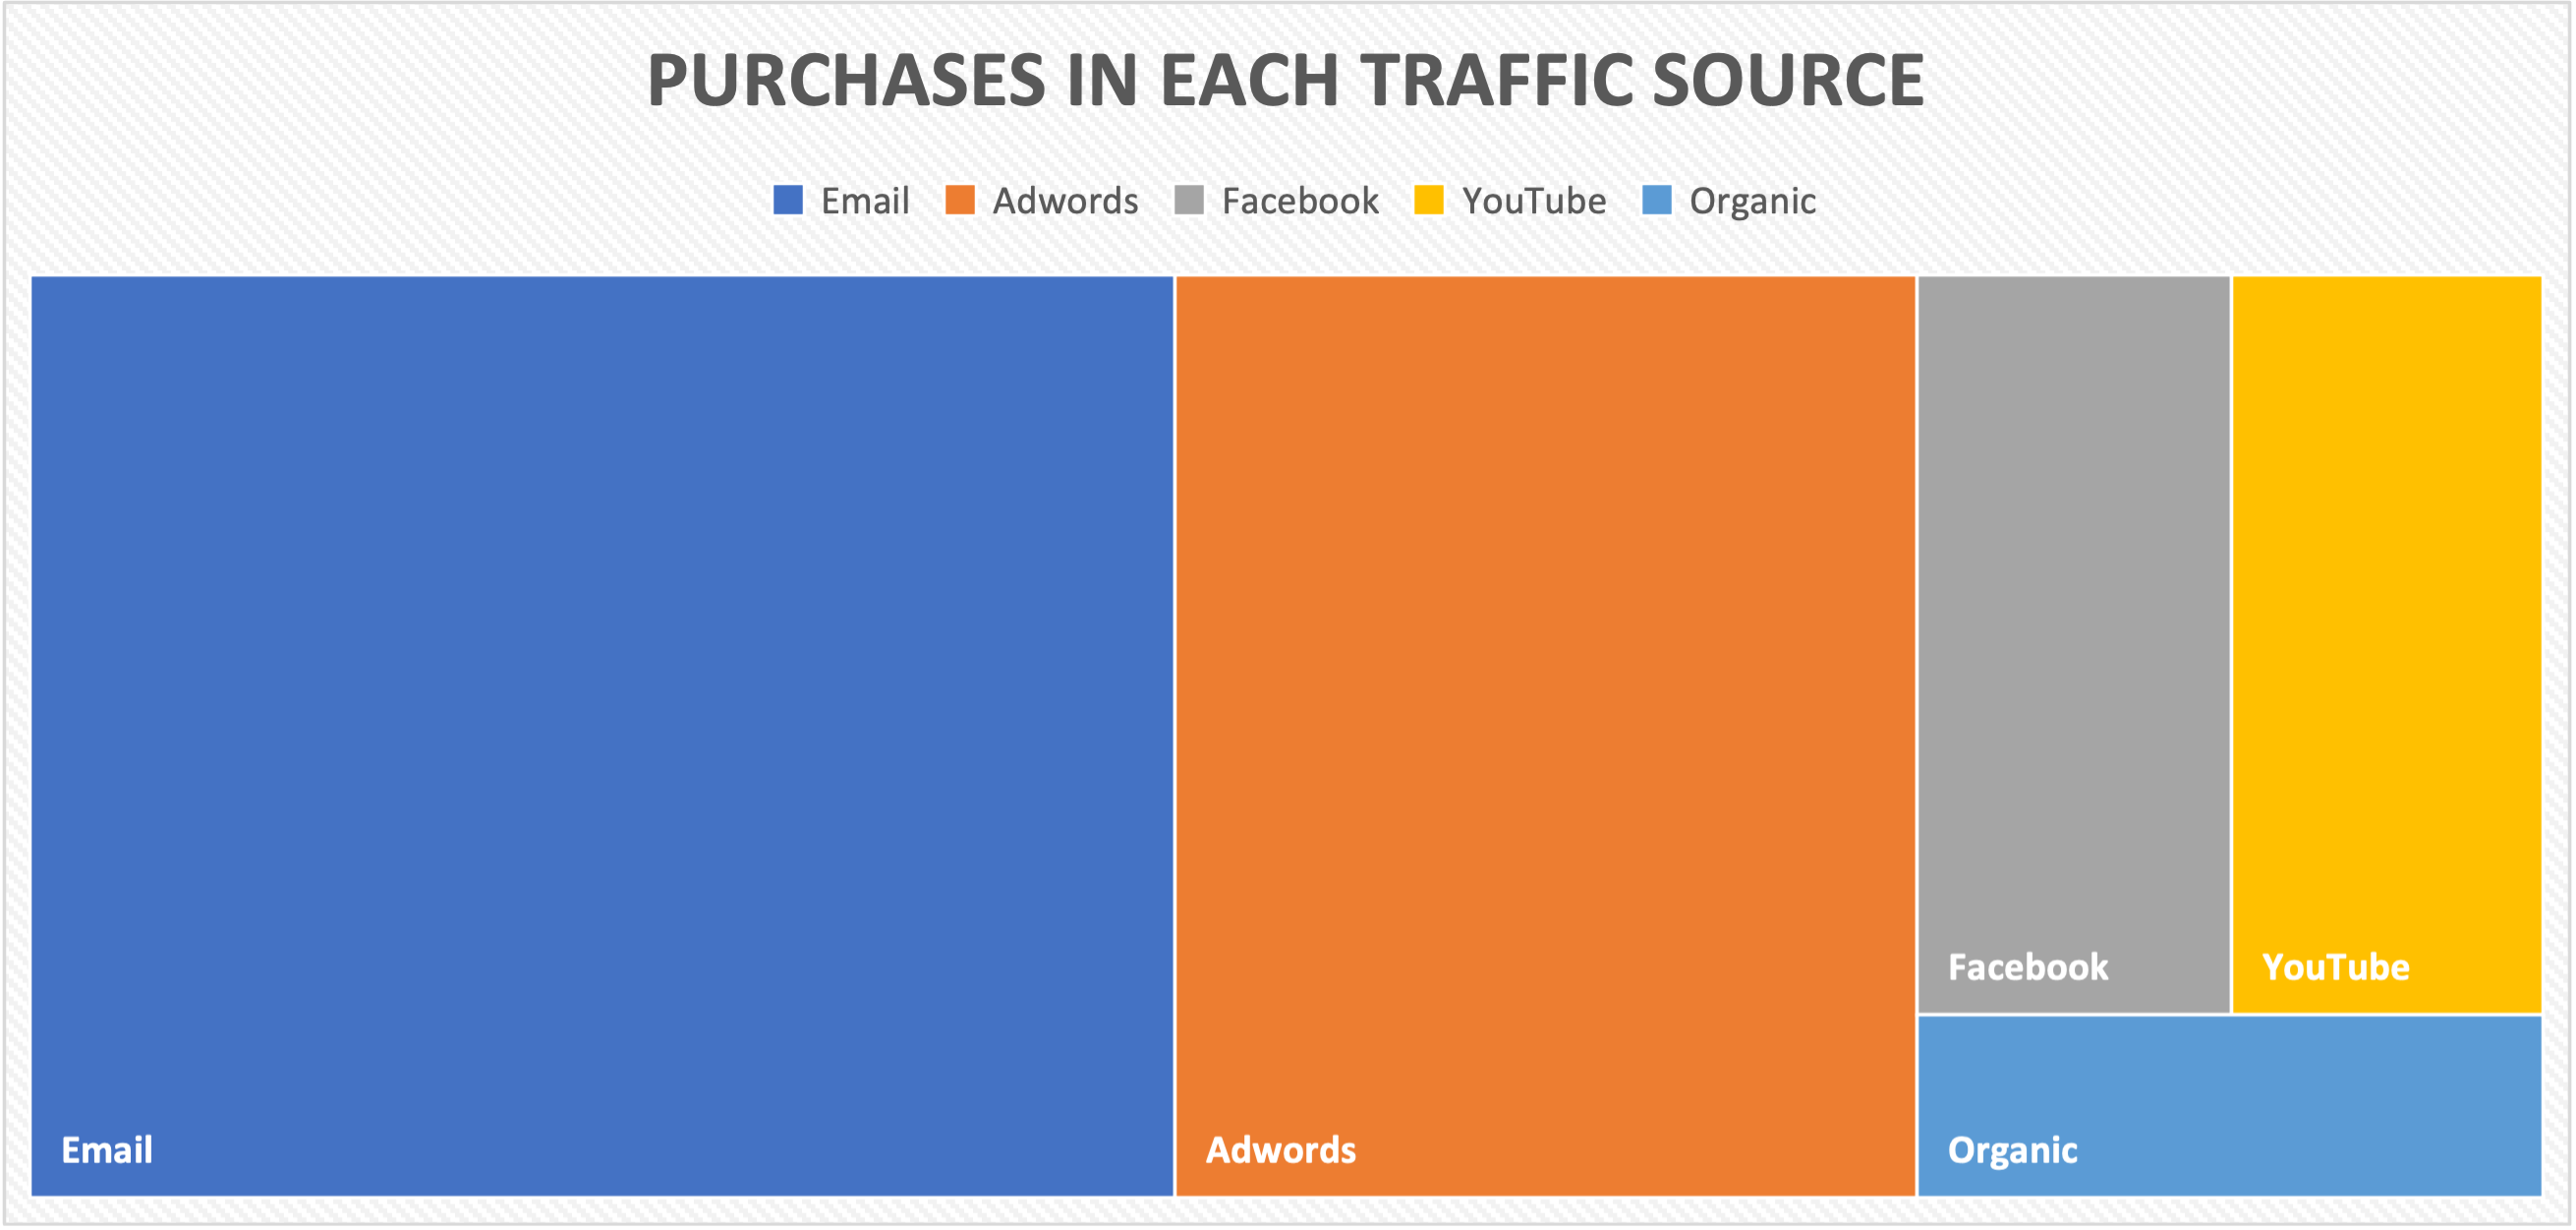

In [47]:
Image(filename='image/marketing/BA775_marketing_Q4.png', width= 1000)

In [1]:
%%bigquery
WITH traffic_source_counts AS
(SELECT traffic_source, event_type, COUNT(*)AS total_counts
 FROM ba775-project-b06.ecommerce_final_tables.marketing_table
 GROUP BY traffic_source, event_type)

SELECT traffic_source, ROUND((conversion_counts/total_counts)*100,2) AS conversion_rate, conversion_counts
FROM 
    (SELECT 
        SUM(CASE WHEN event_type IN ('purchase') THEN total_counts ELSE 0 END) AS conversion_counts,
        SUM(total_counts) AS total_counts,
        traffic_source
    FROM traffic_source_counts
    GROUP BY traffic_source) AS subquery
ORDER BY conversion_counts DESC, conversion_rate DESC

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,conversion_rate,conversion_counts
0,Email,13.81,11546
1,Adwords,13.90,7485
2,Facebook,14.14,2536
3,YouTube,14.66,2521
4,Organic,14.43,1252


- Compared to the overall conversion rate, the **bin#1** customers see overall slightly lower conversion rates: opposite from overall conversions, YouTube sees the lowest conversion rate.

In [2]:
%%bigquery

WITH traffic_source_counts AS
    (SELECT p.brand,traffic_source, m.event_type, COUNT(*)AS total_counts, order_id
     FROM ba775-project-b06.ecommerce_final_tables.marketing_table AS m
     INNER JOIN ba775-project-b06.ecommerce_final_tables.Products AS p
     USING (order_id)
     GROUP BY brand, traffic_source, event_type, m.order_id)

SELECT traffic_source, ROUND(AVG(conversion_counts/total_counts)*100,2) AS conversion_rate, SUM(conversion_counts) AS conversion_counts
FROM (SELECT 
        SUM(CASE WHEN event_type IN ('purchase') THEN total_counts ELSE 0 END) AS conversion_counts,
        SUM(total_counts) AS total_counts,traffic_source,brand,
    FROM traffic_source_counts
    WHERE brand IN ('Hurley', "Joe's Jeans", 'Volcom', 'Speedo', 'Paul Fredrick', 'Columbia', 'Ralph Lauren', '7 For All Mankind', 'Tommy Hilfiger', 'Orvis', 'Jones New York', "Arc'teryx", 'Carhartt', 'Allegra K', 'True Religion', 'Calvin Klein', 'Oakley', "Levi's", 'Diesel', 'Lucky Brand', 'Dockers', 'Mountain Hardwear', 'G-Star', 'Nautica', 'The North Face', 'Ray-Ban', 'Quiksilver', 'Kenneth Cole')
    GROUP BY traffic_source, brand) AS subquery
GROUP BY traffic_source
ORDER BY conversion_counts DESC, conversion_rate DESC

Query is running:   0%|          |

Downloading:   0%|          |

,traffic_source,conversion_rate,conversion_counts
0,Email,13.55,3516
1,Adwords,13.49,2293
2,YouTube,13.18,773
3,Facebook,13.06,719
4,Organic,13.99,378


### 3.9 What’s the typical marketing funnel looking like for our audience?

By looking at the average event clicks and event funnel, we can see that the events generally follow the order of the funnel: **first home page --> department page --> product --> add to cart then purchase**. Although the averages between department, product and cart are very close, this means that customers sometimes go back the forth between these events. 

Typically, we see 14+ clicks of other `event_type` before we see a customer converts. 

In [5]:
%%bigquery
CREATE TABLE IF NOT EXISTS ba775-project-b06.ecommerce_final_tables.marketing_for_tableau AS
WITH funnel_rank AS(
SELECT user_id, event_type, created_at, traffic_source,
RANK() OVER (PARTITION BY user_id ORDER BY created_at) AS event_rank
FROM ba775-project-b06.ecommerce.events)

SELECT user_id, event_type,COUNT(event_type) AS event_count, AVG(event_rank) AS touch_points, created_at
FROM funnel_rank
WHERE user_id IS NOT NULL
GROUP BY user_id, created_at, event_type 

Query is running:   0%|          |

""


In [54]:
%%bigquery

WITH funnel_rank AS(
SELECT user_id, event_type, created_at, traffic_source,
RANK() OVER (PARTITION BY user_id ORDER BY created_at) AS event_rank
FROM ba775-project-b06.ecommerce.events)

SELECT event_type, ROUND(AVG(event_count),2) AS avg_event_count_per_user, ROUND(AVG(touch_points), 0) AS touch_points

FROM (
    SELECT user_id, event_type,COUNT(event_type) AS event_count, AVG(event_rank) AS touch_points
    FROM funnel_rank
    WHERE user_id IS NOT NULL
    GROUP BY user_id, event_type
) AS user_event_counts

GROUP BY event_type
ORDER BY 
    CASE event_type
        WHEN 'home' THEN 1
        WHEN 'department' THEN 2
        WHEN 'product' THEN 3
        WHEN 'cart' THEN 4
        ELSE 5
    END

Query is running:   0%|          |

Downloading:   0%|          |

,event_type,avg_event_count_per_user,touch_points
0,home,1.39,5.0
1,department,4.30,7.0
2,product,4.30,8.0
3,cart,4.30,9.0
4,purchase,2.26,13.0


As one can see, the average conversion timeline is relatively short at 7.4 hours. Hence, to drive customers down the conversion funnel, our marketing frequency can go up as high as **two ads per hour**. 

For example, a customer can first see an advertisement on facebook, clicks in and see another YouTube ad within an hour. 

In [109]:
%%bigquery
WITH journey AS (
    SELECT 
        user_id, 
        created_at, 
        event_type, 
        RANK() OVER(PARTITION BY user_id ORDER BY created_at) AS event_rank
    FROM ba775-project-b06.ecommerce.events)

SELECT ROUND(AVG(TIMESTAMP_DIFF(z.created_at, a.created_at, HOUR)),1) AS conversion_time_in_hour
FROM journey AS a
INNER JOIN journey AS z ON a.user_id = z.user_id
WHERE 
    a.event_rank = (SELECT MIN(event_rank) FROM journey
                    WHERE event_type != 'purchase')
    AND z.event_rank = (SELECT MIN(event_rank) FROM journey 
                        WHERE user_id = a.user_id
                        AND event_type='purchase')

Query is running:   0%|          |

Downloading:   0%|          |

,conversion_time_in_hour
0,7.4


In [102]:
%%bigquery

WITH ranked_events AS (
    SELECT 
        order_id,
        user_id, 
        purchase_time, 
        event_time,
        event_type, 
        RANK() OVER(PARTITION BY user_id ORDER BY event_time DESC) AS last_event_rank
    FROM 
        ba775-project-b06.ecommerce_final_tables.marketing_table
    WHERE 
        purchase_time > event_time
)

SELECT 
    order_id,
    user_id, 
    purchase_time, 
    event_time,
    event_type,
    last_event_rank
FROM 
    ranked_events
WHERE 
    last_event_rank = 1


Query is running:   0%|          |

Downloading:   0%|          |

,order_id,user_id,purchase_time,event_time,event_type,last_event_rank
0,1217,994,2023-08-06 08:34:00+00:00,2023-05-18 04:52:17+00:00,cart,1
1,1975,1587,2023-09-01 16:38:00+00:00,2023-08-04 03:23:42+00:00,cart,1
2,1975,1587,2023-09-01 16:38:00+00:00,2023-08-04 03:23:42+00:00,cart,1
3,2490,2017,2023-04-09 02:42:00+00:00,2022-11-19 05:39:16+00:00,cart,1
4,2490,2017,2023-04-09 02:42:00+00:00,2022-11-19 05:39:16+00:00,cart,1
...,...,...,...,...,...,...
91166,122691,98259,2023-08-02 08:13:00+00:00,2019-10-09 23:34:51+00:00,department,1
91167,122692,98259,2020-01-21 08:13:00+00:00,2019-10-09 23:34:51+00:00,department,1
91168,122691,98259,2023-08-02 08:13:00+00:00,2019-10-09 23:34:51+00:00,department,1
91169,122691,98259,2023-08-02 08:13:00+00:00,2019-10-09 23:34:51+00:00,department,1


In [11]:
%%bigquery
WITH journey AS (
    SELECT event_type, (TIMESTAMP_DIFF(purchase_time, event_time, DAY)) AS conversion_days,
       NTILE(5) OVER (PARTITION BY event_type ORDER BY TIMESTAMP_DIFF(purchase_time, event_time, DAY)) AS bin_number
    FROM
        (SELECT order_id,
               user_id, 
                purchase_time, 
                event_time,
                event_type, 
                RANK() OVER(PARTITION BY user_id ORDER BY event_time DESC) AS last_event
                FROM ba775-project-b06.ecommerce_final_tables.marketing_table
                INNER JOIN (SELECT user_id 
                            FROM ba775-project-b06.ecommerce_final_tables.marketing_table
                            GROUP BY user_id
                            HAVING COUNT(order_id)= 1) 
                USING (user_id)
                WHERE purchase_time > event_time) AS subquery
    WHERE last_event= 1)

SELECT 
    event_type,
    ROUND(AVG(CASE WHEN bin_number = 1 THEN conversion_days ELSE NULL END), 0) AS avg_day_bin_1,
    ROUND(AVG(CASE WHEN bin_number = 2 THEN conversion_days ELSE NULL END), 0) AS avg_day_bin_2,
    ROUND(AVG(CASE WHEN bin_number = 3 THEN conversion_days ELSE NULL END), 0) AS avg_day_bin_3,
    ROUND(AVG(CASE WHEN bin_number = 4 THEN conversion_days ELSE NULL END), 0) AS avg_day_bin_4,
    ROUND(AVG(CASE WHEN bin_number = 5 THEN conversion_days ELSE NULL END), 0) AS avg_day_bin_5,
    ROUND(AVG(conversion_days), 0) AS avg_total
FROM 
    journey
GROUP BY 
    event_type
ORDER BY 
    avg_total

Query is running:   0%|          |

Downloading:   0%|          |

,event_type,avg_day_bin_1,avg_day_bin_2,avg_day_bin_3,avg_day_bin_4,avg_day_bin_5,avg_total
0,cart,52.0,172.0,328.0,558.0,961.0,414.0
1,department,50.0,171.0,338.0,562.0,982.0,421.0
2,product,51.0,176.0,343.0,562.0,988.0,424.0
3,purchase,52.0,179.0,341.0,569.0,990.0,426.0
4,home,42.0,168.0,349.0,589.0,1010.0,432.0


### 3.10 Is there a difference in average shipping time between different distribution centers?

After looking into the product, customer and marketing strategy, we will look into the operation side of the company -- The delivery of products.

We started by looking at the performance differences across different distrubution centers of the company. There are in total **10 distribution centers — all located in the U.S.**

- Shipping time = `delievered_at` - `shipped_at`
- A subtable is created to calculate the shipping time for each order. The average shipping time of each distribution center is calculated by grouping by `product_distribution_center_id` and `product_distribution_center_name`, then taking the average with the `time_difference_hours`.
the sub table is a temporary dataset created to facilitate the calculation of average shipping times for each distribution center. The grouping is done based on the unique identifiers for distribution centers, and the average shipping time is determined using the `time_difference_hours` metric. This type of analysis helps in understanding and managing the efficiency of different distribution centers in terms of order fulfillment.

- Although there are variations in average shipping times among distribution centers, these variations are not significant. The range between the maximum and minimum average shipping times is relatively narrow, with the maximum being **60.52 hours** and the minimum being **59.15 hours**.

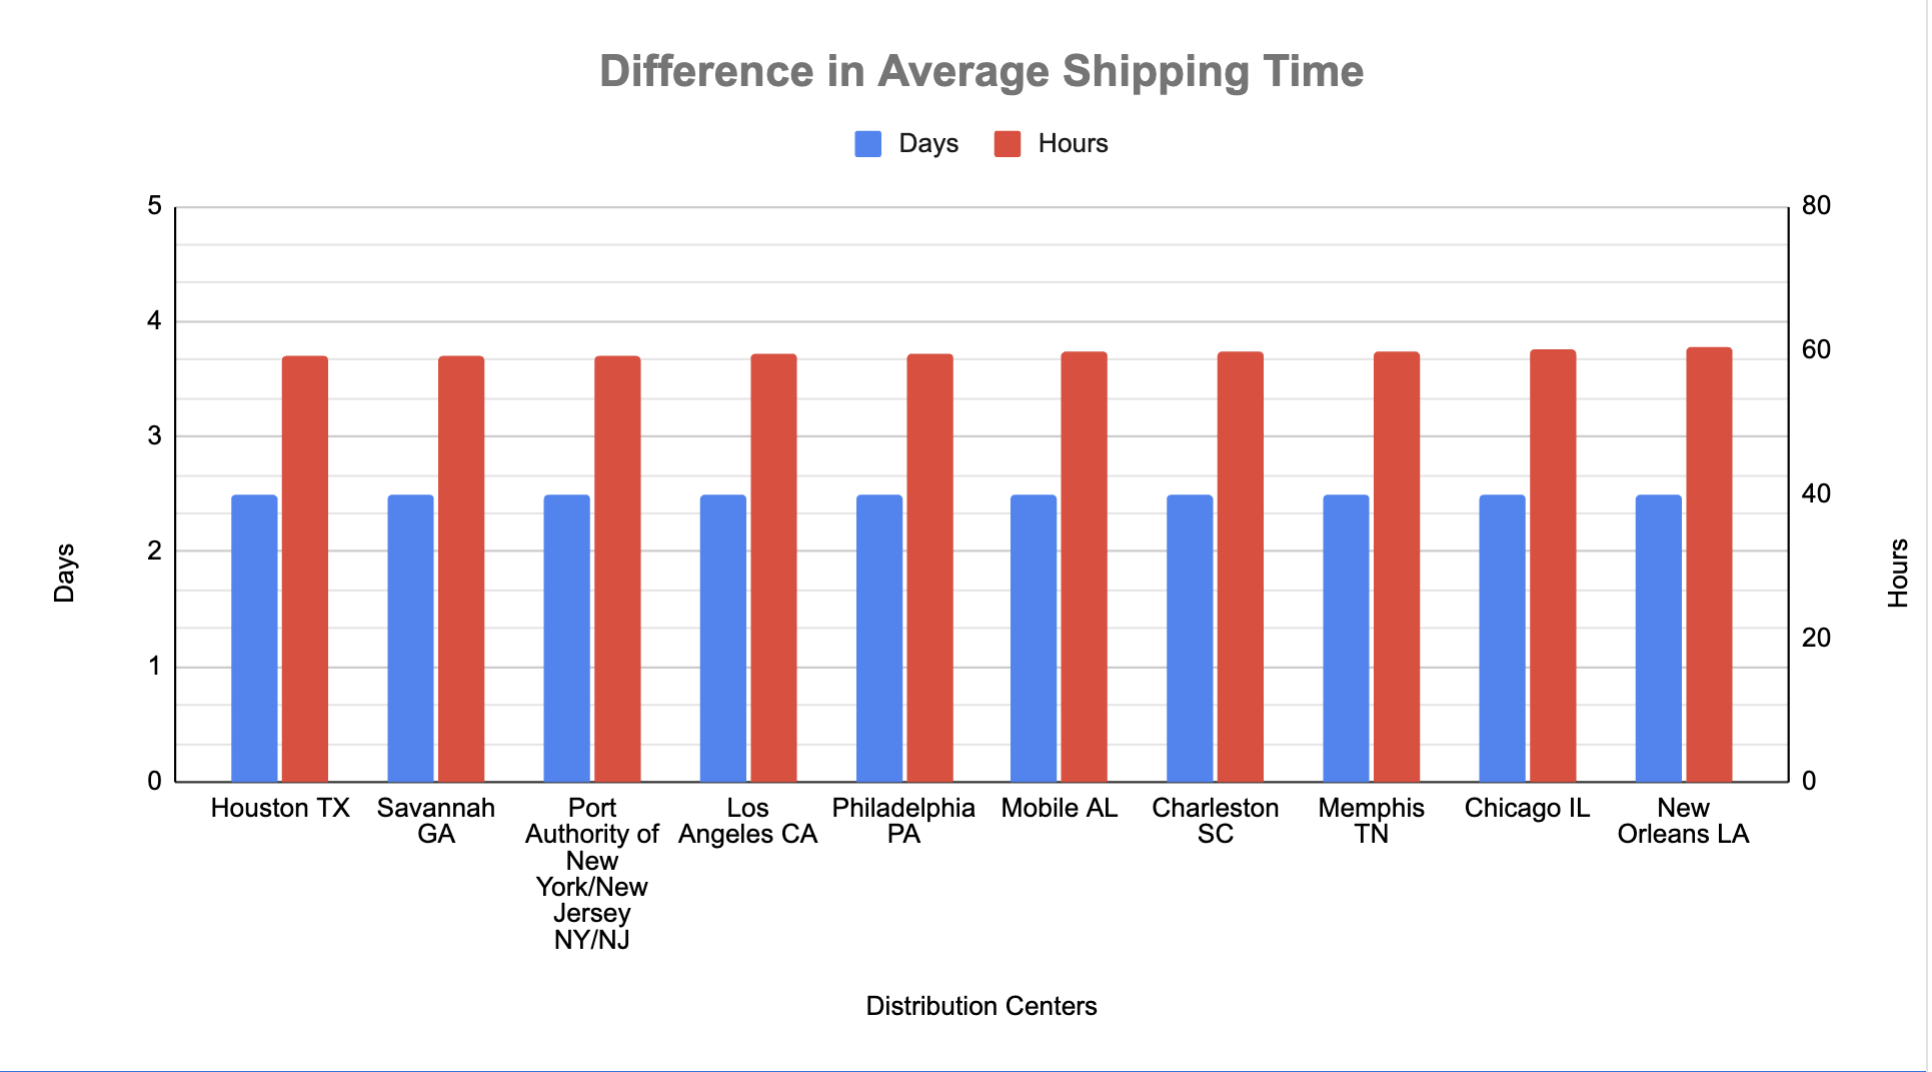

In [2]:
Image(filename = 'image/new operation/3.10.png')

In [12]:
%%bigquery
WITH time_table AS(
  SELECT order_id, shipped_at, delivered_at,product_distribution_center_id, 
    product_distribution_center_name,
    TIMESTAMP_DIFF(delivered_at, TIMESTAMP_SUB(shipped_at, INTERVAL 1 SECOND), SECOND)/3600 AS 
    time_difference_hours,
    TIMESTAMP_DIFF(delivered_at, TIMESTAMP_SUB(shipped_at, INTERVAL 1 SECOND), SECOND)/86400 AS time_difference_days
  FROM
    `ba775-project-b06.ecommerce_final_tables.operation_table`
  WHERE created_at IS NOT NULL AND shipped_at IS NOT NULL AND delivered_at IS NOT NULL AND returned_at IS NULL AND shipped_at < 
    delivered_at)

SELECT product_distribution_center_id, product_distribution_center_name,ROUND(AVG(time_difference_hours),2)AS 
  Avg_Hours_Dist, ROUND(AVG(time_difference_days),1)AS 
  Avg_Days_Dist, 
FROM time_table
GROUP BY product_distribution_center_id, product_distribution_center_name
ORDER BY Avg_Hours_Dist

Query is running:   0%|          |

Downloading:   0%|          |

,product_distribution_center_id,product_distribution_center_name,Avg_Hours_Dist,Avg_Days_Dist
0,3,Houston TX,59.15,2.5
1,10,Savannah GA,59.29,2.5
2,6,Port Authority of New York/New Jersey NY/NJ,59.33,2.5
3,4,Los Angeles CA,59.57,2.5
4,7,Philadelphia PA,59.66,2.5
5,8,Mobile AL,59.71,2.5
6,9,Charleston SC,59.87,2.5
7,1,Memphis TN,59.89,2.5
8,2,Chicago IL,60.26,2.5
9,5,New Orleans LA,60.52,2.5


### 3.11 Is there a difference in average processing time across each distribution center?

There seems to be a slight difference in response time across distribution centers, with the slowest one being **Philadelphia, PA**, taking on average two more hours per order than the fastest distribution center **Mobile, AL**. 

- Processing time = `shipped_at` - `created_at`

-  In the analysis conducted to assess the processing time from order creation to order shipment, a subtable was established to meticulously calculate the duration for each order. This involved the creation of a subtable designed for the precise evaluation of response times. The calculation was based on the 'processing_hours_difference' parameter for each order, with a subsequent grouping operation performed using 'product_distribution_center_id' and 'product_distribution_center_name' to discern the performance of each distribution center.

- The crux of the findings lies in the determination of the average processing time for each distribution center. By aggregating the data and computing the mean of the 'processing_hours_difference' for orders associated with each distribution center, a comprehensive overview of their efficiency was achieved. Notably, the results unveiled a distinct range of processing times across different distribution centers.

- The analysis indicates that the distribution center situated in Port Authority of New York/New Jersey NY/NJ, exhibits the swiftest average processing time among the evaluated centers, clocking in at a commendable **12.15** hours. On the flip side, the distribution center located in New Orleans, LA, emerges with the longest average processing time, registering at **14.73** hours. These findings provide valuable insights into the operational dynamics of each distribution center, pinpointing areas of efficiency and potential improvement within the order fulfillment process.

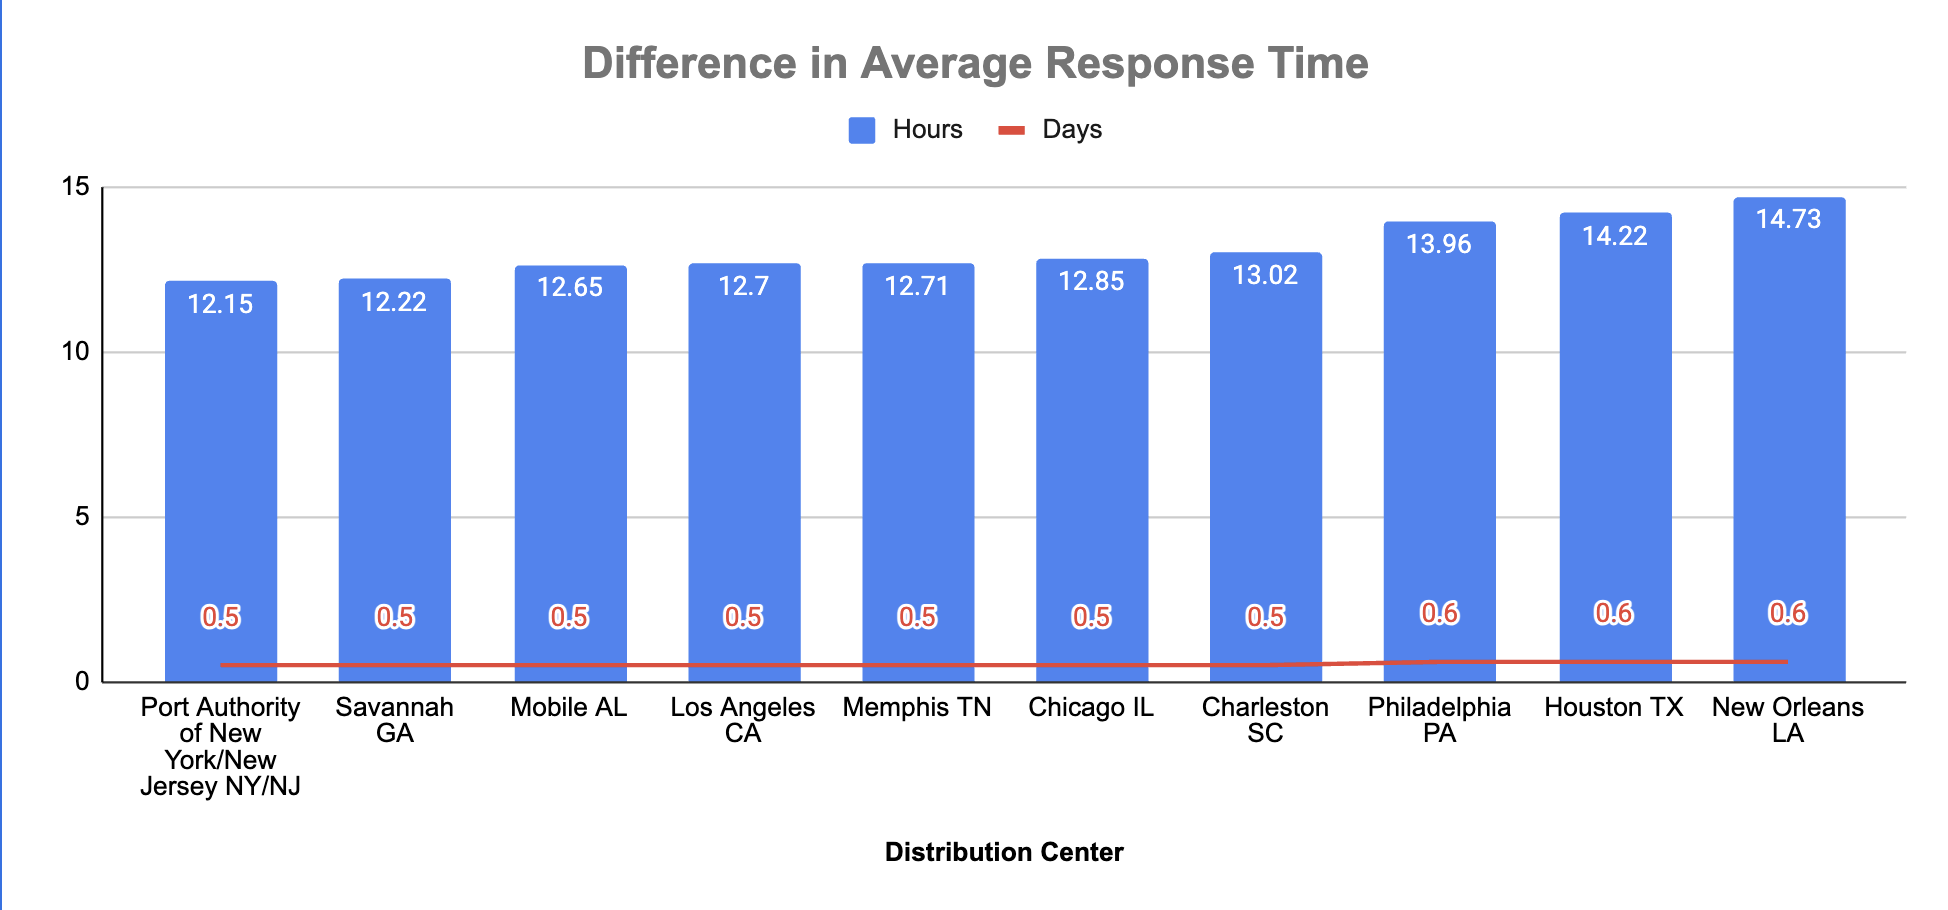

In [3]:
Image(filename = 'image/new operation/3.11.png')

In [8]:
%%bigquery
WITH time_table4 AS(
  SELECT order_id, created_at, shipped_at,product_distribution_center_id, 
    product_distribution_center_name,
    TIMESTAMP_DIFF(shipped_at, TIMESTAMP_SUB(created_at, INTERVAL 1 SECOND), SECOND)/3600 AS 
    response_difference_hours, TIMESTAMP_DIFF(shipped_at, TIMESTAMP_SUB(created_at, INTERVAL 1 SECOND), SECOND)/86400 AS 
    response_difference_days
  FROM
    `ba775-project-b06.ecommerce_final_tables.operation_table`
  WHERE created_at IS NOT NULL AND shipped_at IS NOT NULL AND delivered_at IS NULL AND returned_at IS NULL
)

SELECT product_distribution_center_id, product_distribution_center_name,ROUND(AVG(response_difference_hours),2) AS Avg_Processing_Hours_Dist ,ROUND(AVG(response_difference_days),1)AS 
  Avg_Processing_Days_Dist 
FROM time_table4
GROUP BY product_distribution_center_id,product_distribution_center_name
ORDER BY Avg_Processing_Hours_Dist

Query is running:   0%|          |

Downloading:   0%|          |

,product_distribution_center_id,product_distribution_center_name,Avg_Processing_Hours_Dist,Avg_Processing_Days_Dist
0,6,Port Authority of New York/New Jersey NY/NJ,12.15,0.5
1,10,Savannah GA,12.22,0.5
2,8,Mobile AL,12.65,0.5
3,4,Los Angeles CA,12.70,0.5
4,1,Memphis TN,12.71,0.5
5,2,Chicago IL,12.85,0.5
6,9,Charleston SC,13.02,0.5
7,7,Philadelphia PA,13.96,0.6
8,3,Houston TX,14.22,0.6
9,5,New Orleans LA,14.73,0.6


### 3.12. Is there a difference in average shipping time between different country and continent?

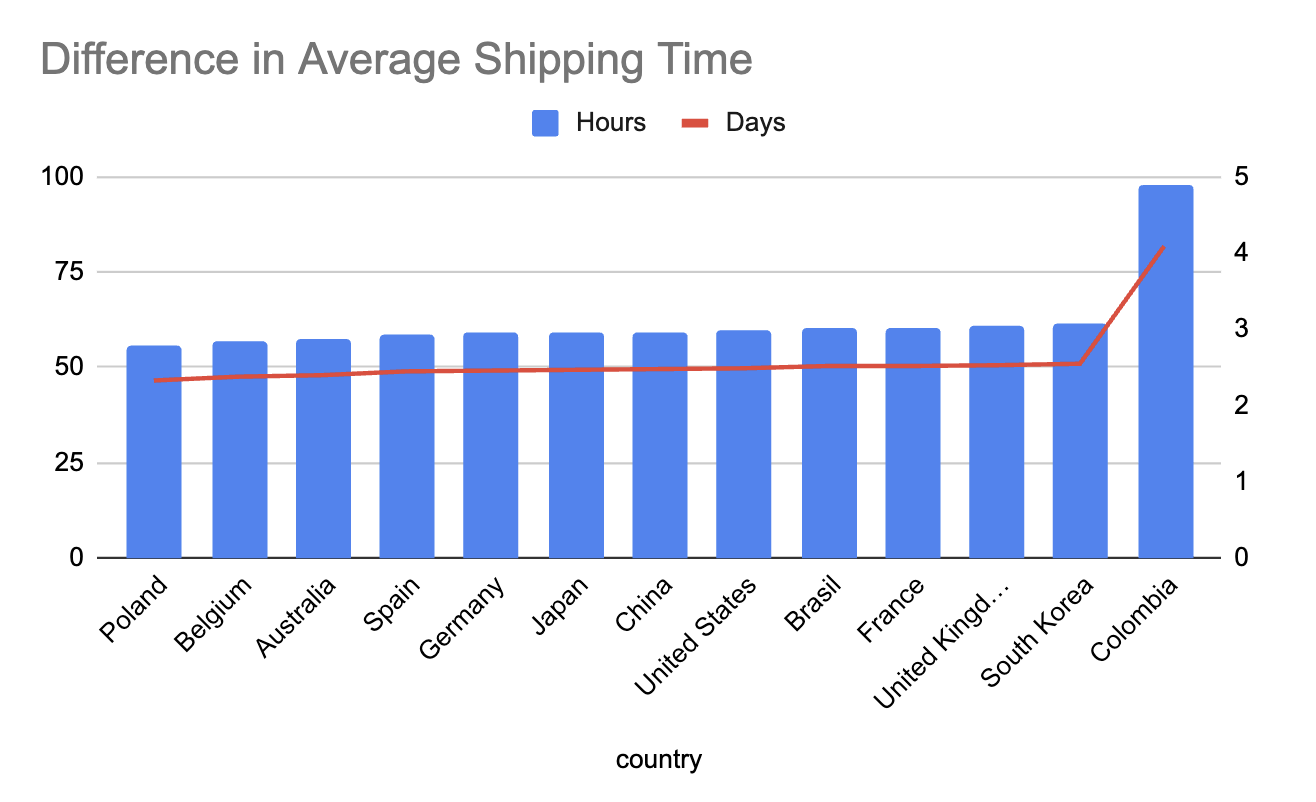

In [5]:
Image(filename='image/new operation/3.12.png')

In [14]:
%%bigquery
CREATE OR REPLACE TABLE ba775-project-b06.ecommerce_final_tables.operation_table_country AS
WITH time_table3 AS(
  SELECT order_id, shipped_at,delivered_at, country,
    TIMESTAMP_DIFF(delivered_at, TIMESTAMP_SUB(shipped_at, INTERVAL 1 SECOND), SECOND)/3600 AS 
    time_difference_hours
  FROM 
    `ba775-project-b06.ecommerce_final_tables.operation_table`
  WHERE created_at IS NOT NULL AND shipped_at IS NOT NULL AND delivered_at IS NOT NULL AND returned_at IS NULL AND shipped_at < 
    delivered_at
)

SELECT country,ROUND(AVG(time_difference_hours),2)AS 
  Avg_Hours_country, ROUND(AVG(time_difference_hours)/24,2)AS 
  Avg_Days
FROM time_table3
GROUP BY country
ORDER BY Avg_Hours_country

Query is running:   0%|          |

""


In [2]:
%%bigquery
SELECT *
FROM`ba775-project-b06.ecommerce_final_tables.operation_table_country`

Query is running:   0%|          |

Downloading:   0%|          |

,country,Avg_Hours_country,Avg_Days
0,Poland,55.91,2.33
1,Belgium,57.00,2.38
2,Australia,57.56,2.40
3,Spain,58.81,2.45
4,Germany,58.97,2.46
5,Japan,59.19,2.47
6,China,59.42,2.48
7,United States,59.72,2.49
8,Brasil,60.47,2.52
9,France,60.51,2.52


* Subtable for Shipping Time Calculation:
A subtable is created to calculate the shipping time for each order. This likely means that from a larger dataset or table containing various information about orders, a subset or subtable is extracted or generated specifically for the purpose of calculating shipping times.
* Grouping by Country:
Within this subtable, the data is organized or grouped based on the 'country' field. This means that orders from the same country are grouped together.
* Calculating Average Shipping Time:
For each group (each country), the average shipping time is calculated. This is done by taking the mean or average of the 'time_difference_hours' for all orders within that country.
* Ordering by Ascending Order:
After calculating the average shipping time for each country, the results are arranged in ascending order. This means that countries with the shortest average shipping times will be listed first, and those with longer times will follow.
* Variability Among States:
The statement mentions that the average shipping time among each state is quite different. This suggests that there is a further level of granularity in the data, with orders being broken down by individual states within each country.
* Range of Average Shipping Times:
The provided range of average shipping times among states is from a minimum of **55.91** hours to a maximum of **98.05** hours. This indicates that there is significant variation in the time it takes for orders to be shipped across different states.

In [1]:
%%bigquery
WITH continent_table AS(
  SELECT
    country,
    Avg_Hours_country,
    CASE
      WHEN country IN ('Colombia', 'Brasil') THEN 'South America'
      WHEN country IN ('Poland', 'Spain', 'United Kingdom', 'Belgium', 'France', 'Germany','Austria') THEN 'Europe'
      WHEN country = 'United States' THEN 'North America'
      WHEN country IN ('China', 'South Korea', 'Japan') THEN 'Asia'
      WHEN country = 'Australia' THEN 'Oceania'
      ELSE 'Unknown'
    END AS Continent
  FROM `ba775-project-b06.ecommerce_final_tables.operation_table_country`
)
SELECT Continent, ROUND(AVG(Avg_Hours_country),2) AS Avg_Hours_continent, ROUND(AVG(Avg_Hours_country)/24,2) AS Avg_Days_continent
FROM continent_table
GROUP BY Continent
ORDER BY Avg_Hours_continent

Query is running:   0%|          |

Downloading:   0%|          |

,Continent,Avg_Hours_continent,Avg_Days_continent
0,Oceania,57.56,2.40
1,Europe,58.65,2.44
2,North America,59.72,2.49
3,Asia,59.97,2.50
4,South America,79.26,3.30


Oceania had the shortest average shipping time, which was about **2.40** days. However, the latest data shows that South America has the longest average shipping time at about **3.3** days. This is mainly averaged out by Columnbia - at 4 days. 

### 3.13. Is there any improvement of average shipping time across 2019-2023？

Overall, there is no obvious improvement or changes in shipping time across four years. The shipping time did increase slightly by about one to two hours in 2020, we suspect this could be due to Covid-19, which potentially increases the international shipping time.

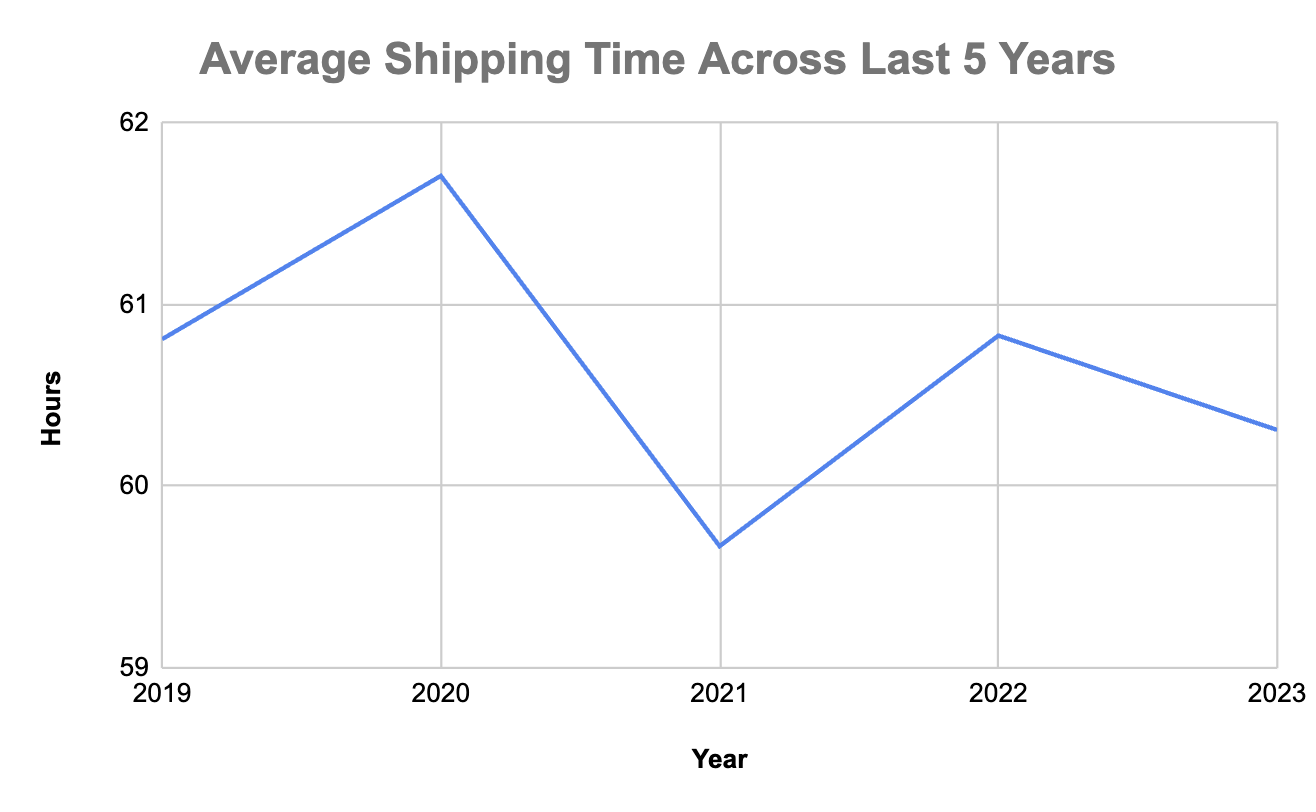

In [4]:
from IPython.display import Image
Image (filename= 'image/new operation/3.13.png', width = 700)

In [17]:
%%bigquery
WITH shipment_table AS(
  SELECT DISTINCT order_id, shipped_at, delivered_at, EXTRACT(YEAR FROM shipped_at) AS extracted_year,
    TIMESTAMP_DIFF(delivered_at, TIMESTAMP_SUB(shipped_at, INTERVAL 1 HOUR), HOUR) AS time_difference_hours,
    TIMESTAMP_DIFF(delivered_at, TIMESTAMP_SUB(shipped_at, INTERVAL 1 HOUR), HOUR)/24 AS time_difference_days
  FROM
    `ba775-project-b06.ecommerce_final_tables.operation_table`
  WHERE created_at IS NOT NULL AND shipped_at IS NOT NULL AND delivered_at IS NOT NULL AND returned_at IS NULL AND shipped_at < delivered_at
)
SELECT extracted_year,ROUND(AVG(time_difference_hours),2) AS time_difference_hours_year, ROUND((AVG(time_difference_hours)/24),2) AS time_difference_days_year
FROM shipment_table
GROUP BY extracted_year
ORDER BY extracted_year

Query is running:   0%|          |

Downloading:   0%|          |

,extracted_year,time_difference_hours_year,time_difference_days_year
0,2019,60.81,2.53
1,2020,61.71,2.57
2,2021,59.67,2.49
3,2022,60.83,2.53
4,2023,60.31,2.51


### 3.14. Is the inventory level of products(in category) matching the profitable ability?

Most categories' ranks and percentage of inventory quantity match their profitability, except for some small deviations, indicating that the business is making the right operation decisions in inventory level.

In [18]:
%%bigquery
WITH table_1 AS(
  WITH inventory_quantity AS(
    SELECT product_category, COUNT(*) AS quantity_of_inventory, 
    FROM `ba775-project-b06.ecommerce.inventory_items`
    WHERE sold_at IS NULL
    GROUP BY product_category
  )
  SELECT product_category, quantity_of_inventory, ROUND(((quantity_of_inventory/total_sum_inventory)*100), 4) AS 
    percentage_inventory
  FROM inventory_quantity,(SELECT SUM(quantity_of_inventory) AS total_sum_inventory FROM inventory_quantity)
  ORDER BY percentage_inventory DESC
)

SELECT table_1.product_category, 
       table_1.quantity_of_inventory,
       # table_2.category_quantity, 
       table_2.category_profit,
       table_1.percentage_inventory,
       table_2.percentage_quantity,
       RANK() OVER (ORDER BY table_1.percentage_inventory DESC) AS percentage_quantity_rank,
       RANK() OVER (ORDER BY table_2.percentage_quantity DESC) AS percentage_profit_rank
FROM(
  WITH category_profit_table AS(
  WITH profit_table AS(
      SELECT name, category,ROUND(sale_price,2)  AS `Sale Price` ,ROUND(product_cost,2 ) AS `Product Cost`,
        SUM(num_of_item) AS quantity,
        ROUND(SUM((sale_price - product_cost) * num_of_item), 2) AS profit
     FROM `ba775-project-b06.ecommerce_final_tables.Products` 
      WHERE status NOT IN ('Cancelled','Returned')
      GROUP BY 1, 2,3,4)
  SELECT category, SUM(quantity) AS category_quantity,ROUND(SUM(profit),2) AS category_profit, 
  FROM profit_table
  GROUP BY 1)
    SELECT category, category_quantity, category_profit, ROUND(((category_quantity/total_quantity)*100), 4) AS percentage_quantity
    FROM category_profit_table,(SELECT SUM(category_quantity) AS total_quantity FROM category_profit_table)) AS table_2
FULL JOIN table_1 
ON table_1.product_category = table_2.category
ORDER BY percentage_quantity DESC

Query is running:   0%|          |

Downloading:   0%|          |

,product_category,quantity_of_inventory,category_profit,percentage_inventory,percentage_quantity,percentage_quantity_rank,percentage_profit_rank
0,Intimates,22844,307155.48,7.4154,7.3380,1,1
1,Jeans,21303,801719.05,6.9152,6.8618,2,2
2,Tops & Tees,20276,314165.17,6.5818,6.7124,3,3
3,Fashion Hoodies & Sweatshirts,20098,435823.20,6.5240,6.4092,4,4
4,Sleep & Lounge,18794,413005.11,6.1007,6.3161,7,5
5,Shorts,19185,361131.41,6.2277,6.1736,6,6
6,Swim,19345,441840.61,6.2796,6.1286,5,7
7,Sweaters,18707,613286.56,6.0725,6.0424,8,8
8,Accessories,16718,359219.65,5.4268,5.5293,9,9
9,Active,15337,380530.67,4.9786,5.0519,11,10


## Conclusion

In conclusion, the business has seen tremendous growth in the past four years — **2023 is its best performing year yet**. Overall, the business has a revenue of $29M and over 180k of orders through almost 80k unique customers.

With over **190% YoY growth** and revenue boost in Q3, the business reached its largest revenue. Among its 2755 brands, the top 27 brands brought in 27% of the revenue. These brands show potential to be capitalized on for maximum revenue. 

As for marketing, we also see a clear seasonality of upticks in summer and fall. Fall especially sees highest revenue and profit. This allows the marketing department to capitalize on the seasonal spending pattern. Another marketing tactic is to gender target for specific categories such as: Pants, Dresses, Maternity, etc. The business sees 100% of contributed by one of the genders. 

Lastly, we believe that the shipping efficiency needs to be balanced more across continents. The shipping time average sees fastest shipping to Oceania, and slowest to *South America*, the difference is as large as over 20 hours. This is due to certain South American countries seeing exceptionally long shipping time, such as Columbia. An explanation could be due to Columbia’s client base being extremely small, which leads to a lack of shipping partners. A solution to this could be to continue seeking reliable shipping partners to enhance current customer base and attract new customers. 

## Challenges

In the process of undertaking this project, we encountered quite a few challenges. One worth mentioning is recognizing the scope of work for each department. For instance, the Operations team ideally should analyze products and revenue, but it creates an overlap with the Product team. It required constant communication to balance the scope of work and analysis.

Another noteworthy aspect is aligning the format of BigQuery tables for each of our departments. One department updated the table during the project, introducing new data points, as our data source updates in real time. This also attested to our teamwork, as we ultimately collaborated to ensure the data reverted to a consistent timeframe

## Citations

- ChatGPT: Used for grammar checks. 
- [Marketing Funnel](https://sproutsocial.com/glossary/marketing-funnel/)

## Apendix

#### Time Range - Operation

The maximum shipping time is 120 hours, which is about 8 days, and the minimum shipping time is only 1 hour.

In [10]:
%%bigquery
WITH ship_time AS(
  SELECT order_id, shipped_at, delivered_at,
    TIMESTAMP_DIFF(delivered_at, TIMESTAMP_SUB(shipped_at, INTERVAL 1 HOUR), HOUR) AS time_difference_hours,
  FROM
    `ba775-project-b06.ecommerce_final_tables.operation_table`
  WHERE status = 'Complete'
)
SELECT MAX(time_difference_hours) AS max_shiptime, MIN(time_difference_hours) AS min_shiptime
FROM ship_time

Query is running:   0%|          |

Downloading:   0%|          |

,max_shiptime,min_shiptime
0,120,1


#### Overall Revenue

In [164]:
%%bigquery
SELECT SUM(sale_price * num_of_item)/1000000 AS overall_rev
FROM `ba775-project-b06.ecommerce_final_tables.Product`

Query is running:   0%|          |

Downloading:   0%|          |

,overall_rev
0,20.609937


#### Departments and categories

In [8]:
%%bigquery

SELECT department, category
FROM ba775-project-b06.ecommerce_final_tables.Products
GROUP BY department, category
ORDER BY department, category

Query is running:   0%|          |

Downloading:   0%|          |

,department,category
0,Men,Accessories
1,Men,Active
2,Men,Fashion Hoodies & Sweatshirts
3,Men,Jeans
4,Men,Outerwear & Coats
5,Men,Pants
6,Men,Shorts
7,Men,Sleep & Lounge
8,Men,Socks
9,Men,Suits & Sport Coats


## Dashborad

Link to dashboard: https://public.tableau.com/app/profile/jessica.tong1527/viz/BA775_team_assignment_version2_17020855878190/Product_Marketing_Dashboard#2

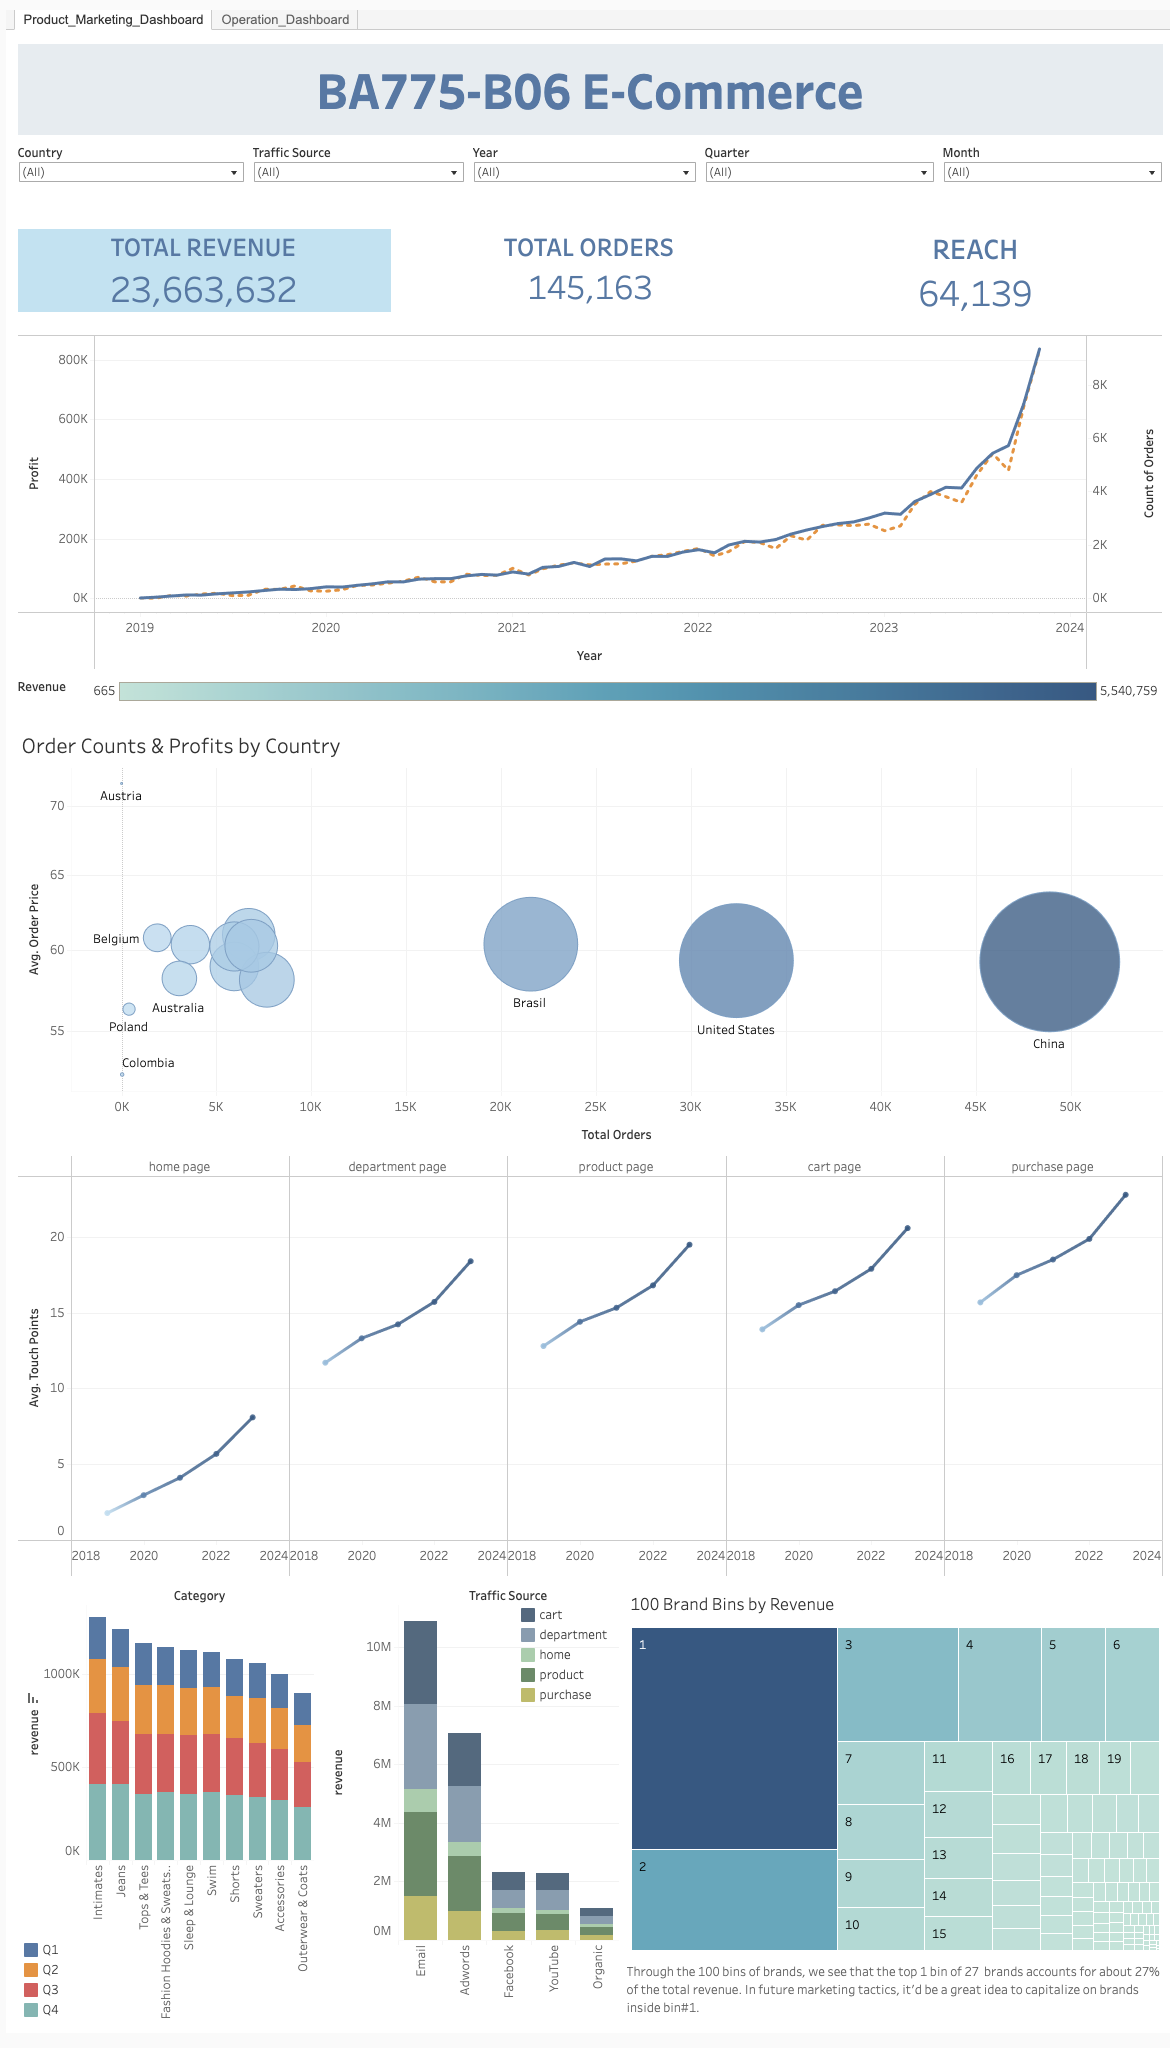

In [1]:
from IPython.display import Image
Image(filename = 'image/dashboard/marketing & product.png')

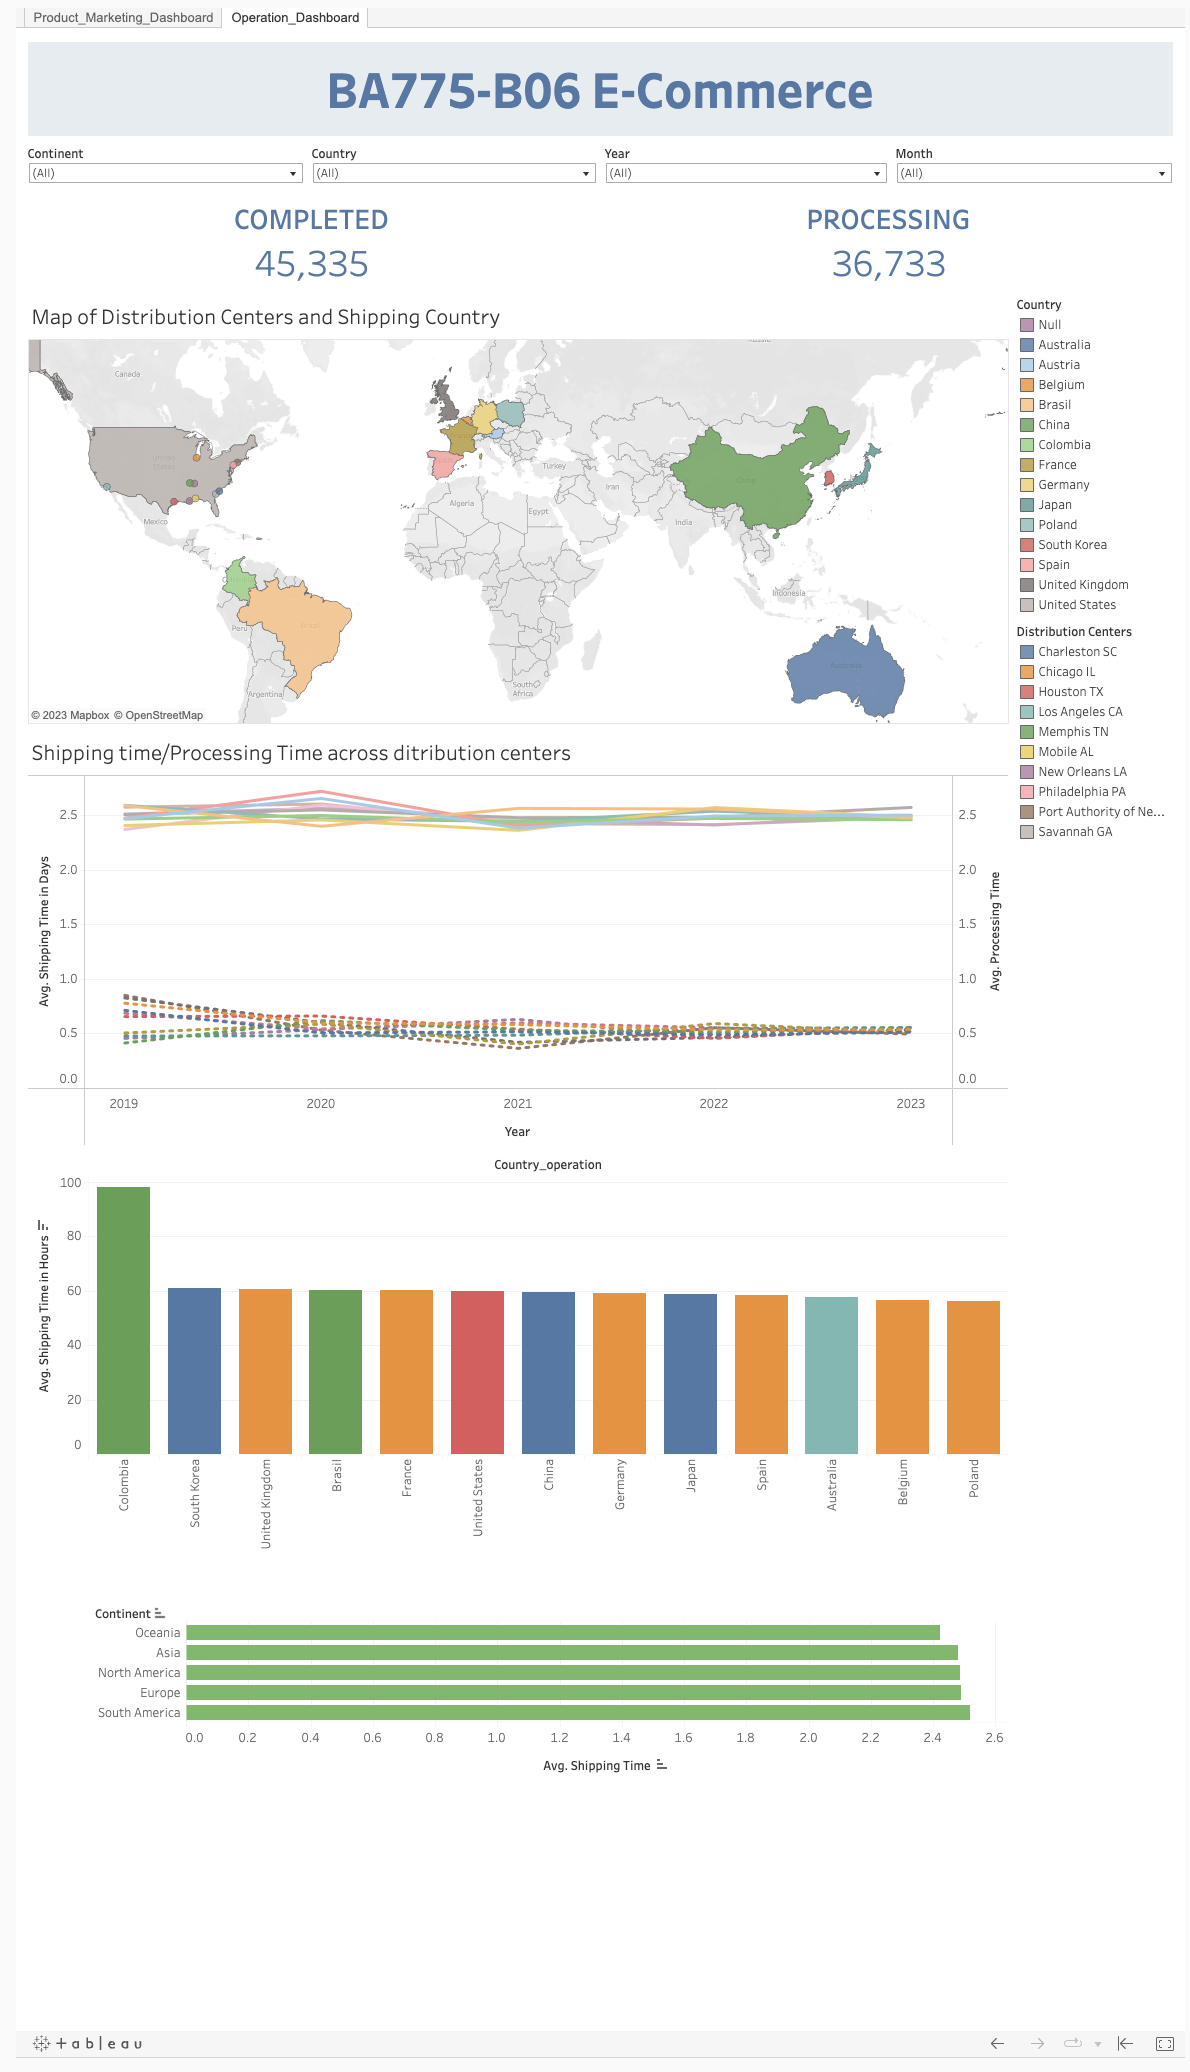

In [2]:
Image(filename = 'image/dashboard/operation.png')